In [ ]:

import pandas as pd

# Read the original CSV file
df = pd.read_csv("/content/drive/MyDrive/ibtracs.NI.list.v04r00.csv")

# Combine column names with descriptions
column_names_with_desc = []
for col, desc in zip(df.columns, df.iloc[0]):
    # Check if the second row is empty for this column
    if pd.isnull(df.iloc[1][col]):
        column_names_with_desc.append(col)
    else:
        column_names_with_desc.append(f"{col}_{desc}")

# Remove the first row (description row) from the DataFrame
df = df.iloc[1:]

# Assign the updated column names
df.columns = column_names_with_desc

print(df.columns)

df_ni = df[df['BASIN_ '] == 'NI']
df=df_ni
print(df_ni)

<ipython-input-2-793b8f8f85cf>:4: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/ibtracs.NI.list.v04r00.csv")


Index(['SID_ ', 'SEASON_Year', 'NUMBER_ ', 'BASIN_ ', 'SUBBASIN_ ', 'NAME_ ',
       'ISO_TIME_ ', 'NATURE_ ', 'LAT_degrees_north', 'LON_degrees_east',
       ...
       'BOM_GUST_PER_second', 'REUNION_GUST_kts', 'REUNION_GUST_PER_second',
       'USA_SEAHGT_ft', 'USA_SEARAD_NE_nmile', 'USA_SEARAD_SE_nmile',
       'USA_SEARAD_SW_nmile', 'USA_SEARAD_NW_nmile', 'STORM_SPEED_kts',
       'STORM_DIR_degrees'],
      dtype='object', length=163)
               SID_  SEASON_Year NUMBER_  BASIN_  SUBBASIN_      NAME_   \
1      1842298N11080        1842        1      NI         BB  NOT_NAMED   
2      1842298N11080        1842        1      NI         BB  NOT_NAMED   
3      1842298N11080        1842        1      NI         BB  NOT_NAMED   
4      1842298N11080        1842        1      NI         BB  NOT_NAMED   
5      1842298N11080        1842        1      NI         BB  NOT_NAMED   
...              ...         ...      ...     ...        ...        ...   
60654  2023337N12083        20

In [ ]:
# Define prefixes to delete
prefixes_to_delete = ['WMO', 'USA', 'TOKYO', 'CMA', 'HKO', 'REUNION', 'BOM', 'NADI', 'WELLINGTON', 'DS', 'TD', 'NEUMANN', 'MLC','NEWDELHI','IFLAG']

# Filter columns to keep
columns_to_keep = [col for col in df.columns if not any(col.startswith(prefix) for prefix in prefixes_to_delete)]

# Create a new DataFrame with the columns to keep
df_filtered = df[columns_to_keep]

print(df_filtered)

               SID_  SEASON_Year NUMBER_  BASIN_  SUBBASIN_      NAME_   \
1      1842298N11080        1842        1      NI         BB  NOT_NAMED   
2      1842298N11080        1842        1      NI         BB  NOT_NAMED   
3      1842298N11080        1842        1      NI         BB  NOT_NAMED   
4      1842298N11080        1842        1      NI         BB  NOT_NAMED   
5      1842298N11080        1842        1      NI         BB  NOT_NAMED   
...              ...         ...      ...     ...        ...        ...   
60654  2023337N12083        2023       83      NI         BB   MICHAUNG   
60655  2023337N12083        2023       83      NI         BB   MICHAUNG   
60656  2023337N12083        2023       83      NI         BB   MICHAUNG   
60657  2023337N12083        2023       83      NI         BB   MICHAUNG   
60658  2023337N12083        2023       83      NI         BB   MICHAUNG   

                ISO_TIME_  NATURE_  LAT_degrees_north LON_degrees_east  \
1      1842-10-25 03:00:0

In [ ]:
# Filter rows where a specific column's value is different from "not_named"
df_filtered['SEASON_Year'] = df_filtered['SEASON_Year'].astype(int)
df_filtered = df_filtered[df_filtered['SEASON_Year'] >= 1900]


<ipython-input-4-a5ebc15eec50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['SEASON_Year'] = df_filtered['SEASON_Year'].astype(int)


In [ ]:
print(df_filtered)

               SID_   SEASON_Year NUMBER_  BASIN_  SUBBASIN_      NAME_   \
8761   1900162N19088         1900        8      NI         BB  NOT_NAMED   
8762   1900162N19088         1900        8      NI         BB  NOT_NAMED   
8763   1900162N19088         1900        8      NI         BB  NOT_NAMED   
8764   1900162N19088         1900        8      NI         BB  NOT_NAMED   
8765   1900162N19088         1900        8      NI         BB  NOT_NAMED   
...              ...          ...      ...     ...        ...        ...   
60654  2023337N12083         2023       83      NI         BB   MICHAUNG   
60655  2023337N12083         2023       83      NI         BB   MICHAUNG   
60656  2023337N12083         2023       83      NI         BB   MICHAUNG   
60657  2023337N12083         2023       83      NI         BB   MICHAUNG   
60658  2023337N12083         2023       83      NI         BB   MICHAUNG   

             ISO_TIME_  NATURE_  LAT_degrees_north LON_degrees_east  \
8761   11-06-190

In [ ]:
import math
import pandas as pd

def angleFromCoordinate(lat1, lon1, lat2, lon2):
    dLon = (lon2 - lon1)
    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)
    brng = math.atan2(y, x)
    brng = math.degrees(brng)
    brng = (brng + 360) % 360
    brng = 360 - brng  # count degrees clockwise - remove to make counter-clockwise
    return brng

def calculate_angles(df):
    angles = []
    prev_lat = None
    prev_lon = None
    prev_sid = None

    for index, row in df.iterrows():
        if prev_lat is None or prev_lon is None or row['NAME_ '] != prev_sid:
            angles.append(0.0)
        else:
            angle = angleFromCoordinate(prev_lat, prev_lon, row['LAT_degrees_north'], row['LON_degrees_east'])
            angles.append(angle)
        prev_lat = row['LAT_degrees_north']
        prev_lon = row['LON_degrees_east']
        prev_sid = row['NAME_ ']

    df['ANGLE'] = angles
    return df

# Apply angle calculation function to the filtered DataFrame
df_filtered = calculate_angles(df_filtered)

# Display the DataFrame (no need to save)
df_filtered.head(5)


,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,TRACK_TYPE_,DIST2LAND_km,LANDFALL_km,STORM_SPEED_kts,STORM_DIR_degrees,ANGLE
8761,1900162N19088,1900,8,NI,BB,NOT_NAMED,11-06-1900 00:00,TS,19.1,88.3,main,214,191,4,289,0.000000
8762,1900162N19088,1900,8,NI,BB,NOT_NAMED,11-06-1900 03:00,TS,19.1667,88.1,main,191,160,5,289,69.295411
8763,1900162N19088,1900,8,NI,BB,NOT_NAMED,11-06-1900 06:00,TS,19.2602,87.8152,main,160,130,6,289,67.846901
8764,1900162N19088,1900,8,NI,BB,NOT_NAMED,11-06-1900 09:00,TS,19.3574,87.5202,main,130,115,6,289,66.187321
8765,1900162N19088,1900,8,NI,BB,NOT_NAMED,11-06-1900 12:00,TS,19.4502,87.2414,main,100,84,6,289,64.527110


In [ ]:
df_filtered.reset_index(drop=True, inplace=True)

In [ ]:
df_filtered.columns

Index(['SID_ ', 'SEASON_Year', 'NUMBER_ ', 'BASIN_ ', 'SUBBASIN_ ', 'NAME_ ',
       'ISO_TIME_ ', 'NATURE_ ', 'LAT_degrees_north', 'LON_degrees_east',
       'TRACK_TYPE_ ', 'DIST2LAND_km', 'LANDFALL_km', 'STORM_SPEED_kts',
       'STORM_DIR_degrees', 'ANGLE'],
      dtype='object')

In [ ]:
import math
import pandas as pd

def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Calculate the change in coordinates
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Apply Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculate the distance
    distance = R * c
    return distance

def calculate_distances(df):
    distances = []
    prev_lat = None
    prev_lon = None
    prev_sid = None

    for index, row in df.iterrows():
        if prev_lat is None or prev_lon is None or row['NAME_ '] != prev_sid:
            distances.append(0.0)
        else:
            distance = haversine(prev_lat, prev_lon, row['LAT_degrees_north'], row['LON_degrees_east'])
            distances.append(distance)
        prev_lat = row['LAT_degrees_north']
        prev_lon = row['LON_degrees_east']
        prev_sid = row['NAME_ ']

    df['DISTANCE_km'] = distances
    return df

# Apply distance calculation function to the DataFrame
df_filtered = calculate_distances(df_filtered)

# Display the DataFrame with distances
print(df_filtered)


               SID_   SEASON_Year NUMBER_  BASIN_  SUBBASIN_      NAME_   \
0      1900162N19088         1900        8      NI         BB  NOT_NAMED   
1      1900162N19088         1900        8      NI         BB  NOT_NAMED   
2      1900162N19088         1900        8      NI         BB  NOT_NAMED   
3      1900162N19088         1900        8      NI         BB  NOT_NAMED   
4      1900162N19088         1900        8      NI         BB  NOT_NAMED   
...              ...          ...      ...     ...        ...        ...   
47008  2023337N12083         2023       83      NI         BB   MICHAUNG   
47009  2023337N12083         2023       83      NI         BB   MICHAUNG   
47010  2023337N12083         2023       83      NI         BB   MICHAUNG   
47011  2023337N12083         2023       83      NI         BB   MICHAUNG   
47012  2023337N12083         2023       83      NI         BB   MICHAUNG   

             ISO_TIME_  NATURE_  LAT_degrees_north LON_degrees_east  \
0      11-06-190

In [ ]:
# prompt: save the file

df_filtered.to_csv("/content/processed_ibtracs.csv")


In [ ]:
from datetime import datetime

In [ ]:
import pandas as pd

# Assuming df_filtered is your DataFrame containing the relevant data

# Convert ISO_TIME_ column to datetime objects with the specified format
df_filtered['ISO_TIME_ '] = pd.to_datetime(df_filtered['ISO_TIME_ '], format='%d-%m-%Y %H:%M')

# Sort DataFrame by 'NAME_' and 'ISO_TIME_'
df_sorted = df_filtered.sort_values(by=['SID_ ', 'ISO_TIME_ '])

# Initialize a variable to store the first instance of ISO_TIME_ for each NAME_
first_instance_time = None

# Initialize a variable to store the previous NAME_
previous_name = None

# Initialize an empty list to store the time differences
time_differences = []

# Loop through each row in the sorted DataFrame
for index, row in df_sorted.iterrows():
    # Check if the NAME_ has changed
    if row['SID_ '] != previous_name:
        # If so, update the first_instance_time and previous_name
        first_instance_time = row['ISO_TIME_ ']
        previous_name = row['SID_ ']

    # Calculate the time difference in hours from the first instance time
    time_difference_hours = (row['ISO_TIME_ '] - first_instance_time).total_seconds() / 3600

    # Append the time difference to the list
    time_differences.append(time_difference_hours)

# Add the time differences as a new column to the DataFrame
df_sorted['TIME_DIFFERENCE_hours'] = time_differences

# Display the DataFrame
print(df_sorted)
df_sorted.to_csv('processed_data.csv')


               SID_   SEASON_Year NUMBER_  BASIN_  SUBBASIN_      NAME_   \
0      1900162N19088         1900        8      NI         BB  NOT_NAMED   
1      1900162N19088         1900        8      NI         BB  NOT_NAMED   
2      1900162N19088         1900        8      NI         BB  NOT_NAMED   
3      1900162N19088         1900        8      NI         BB  NOT_NAMED   
4      1900162N19088         1900        8      NI         BB  NOT_NAMED   
...              ...          ...      ...     ...        ...        ...   
47008  2023337N12083         2023       83      NI         BB   MICHAUNG   
47009  2023337N12083         2023       83      NI         BB   MICHAUNG   
47010  2023337N12083         2023       83      NI         BB   MICHAUNG   
47011  2023337N12083         2023       83      NI         BB   MICHAUNG   
47012  2023337N12083         2023       83      NI         BB   MICHAUNG   

               ISO_TIME_  NATURE_  LAT_degrees_north LON_degrees_east  \
0     1900-06-

In [ ]:
df_sorted.head(10)

,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,TRACK_TYPE_,DIST2LAND_km,LANDFALL_km,STORM_SPEED_kts,STORM_DIR_degrees,ANGLE,DISTANCE_km,TIME_DIFFERENCE_hours
0,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11 00:00:00,TS,19.1,88.3,main,214,191,4,289,0.000000,0.000000,0.0
1,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11 03:00:00,TS,19.1667,88.1,main,191,160,5,289,69.295411,22.281091,3.0
2,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11 06:00:00,TS,19.2602,87.8152,main,160,130,6,289,67.846901,31.660107,6.0
3,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11 09:00:00,TS,19.3574,87.5202,main,130,115,6,289,66.187321,32.789848,9.0
4,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11 12:00:00,TS,19.4502,87.2414,main,100,84,6,289,64.527110,31.007647,12.0
5,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11 15:00:00,TS,19.5462,86.9462,main,76,54,6,290,62.815630,32.731871,15.0
6,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11 18:00:00,TS,19.6506,86.6668,main,45,22,5,295,57.658604,31.486164,18.0
7,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11 21:00:00,TS,19.7734,86.4183,main,22,10,6,299,47.512085,29.378771,21.0
8,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-12 00:00:00,TS,19.9209,86.1496,main,0,0,7,299,38.355494,32.539202,24.0
9,1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-12 03:00:00,TS,20.0925,85.8075,main,0,0,8,298,29.995080,40.518283,27.0


In [ ]:
import pandas as pd


# Group by 'SID_' and select the first instance of each group
first_instances = df_sorted.groupby('SID_ ').first()

first_instances.head(10)

,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,TRACK_TYPE_,DIST2LAND_km,LANDFALL_km,STORM_SPEED_kts,STORM_DIR_degrees,ANGLE,DISTANCE_km,TIME_DIFFERENCE_hours
SID_,,,,,,,,,,,,,,,,,
1900162N19088,1900,8,NI,BB,NOT_NAMED,1900-06-11,TS,19.1,88.3,main,214,191,4,289,0.000000,0.000000,0.0
1900173N21088,1900,10,NI,BB,NOT_NAMED,1900-06-22,TS,20.9,88.1,main,78,67,1,327,334.367419,493.639844,0.0
1900194N21088,1900,12,NI,BB,NOT_NAMED,1900-07-13,TS,21.3,88.2,main,33,24,7,298,197.699893,193.467678,0.0
1900210N19088,1900,13,NI,BB,NOT_NAMED,1900-07-29,TS,18.6,88.4,main,260,253,1,264,43.009427,1393.710090,0.0
1900221N20088,1900,14,NI,BB,NOT_NAMED,1900-08-09,TS,20.2,87.9,main,109,109,0,0,343.314722,830.283421,0.0
1900227N20091,1900,15,NI,BB,NOT_NAMED,1900-08-15,TS,19.9,90.7,main,198,198,1,295,317.339036,1639.459665,0.0
1900237N21090,1900,20,NI,BB,NOT_NAMED,1900-08-25,TS,20.7,89.7,main,116,116,0,0,357.364582,1367.559562,0.0
1900258N21088,1900,28,NI,BB,NOT_NAMED,1900-09-15,TS,20.5,88.1,main,116,106,1,264,40.701948,1060.144783,0.0
1900277N15087,1900,32,NI,BB,NOT_NAMED,1900-10-04,TS,15.1,87.0,main,472,464,2,327,304.968504,1284.125307,0.0


<Figure size 1500x800 with 0 Axes>

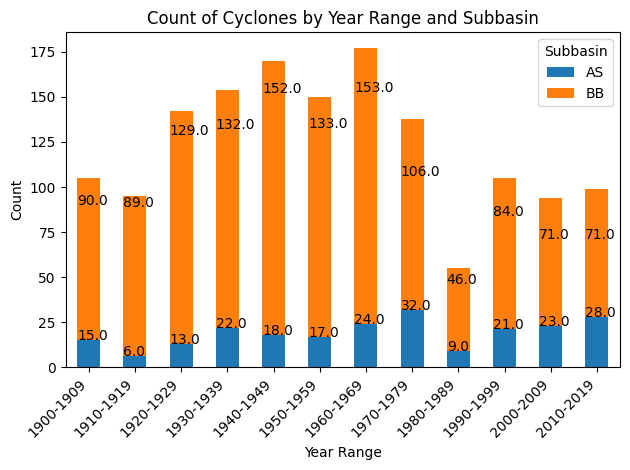

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the year range bins
year_bins = range(1900, 2030, 10)

# Define the labels for the year ranges
year_labels = [f"{start}-{start+9}" for start in year_bins[:-1]]

# Create a new column to categorize the years into the year range bins
first_instances['YEAR_RANGE'] = pd.cut(first_instances['SEASON_Year'], bins=year_bins, labels=year_labels, right=False)

# Group by the year range bins and the SUBBASIN_ column, and count the occurrences
counts = first_instances.groupby(['YEAR_RANGE', 'SUBBASIN_ ']).size().unstack(fill_value=0)


# Set the size of the plot
plt.figure(figsize=(15, 8))  # Increase the size further

# Plot the counts for each year range
ax = counts.plot(kind='bar', stacked=True)
plt.xlabel('Year Range')
plt.ylabel('Count')
plt.title('Count of Cyclones by Year Range and Subbasin')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subbasin')
plt.tight_layout()

# Add annotations to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1))

# Save the plot
plt.savefig('count_cyclones_by_year_range_and_subbasin_with_annotations.png', dpi=300)  # Save with higher resolution
plt.show()

In [ ]:
# prompt: make the subbasin values from text to numerical BB to 1  and AS to 2

df_sorted['SUBBASIN_ '] = df_sorted['SUBBASIN_ '].replace(['BB', 'AS'], [1, 2])


In [ ]:
df_sorted['NATURE_ '] = df_sorted['NATURE_ '].replace(['DS', 'TS' , 'ET' , 'SS' , 'NR' , 'MX'], [1, 2 , 3 , 4 , 5 , 6])

In [ ]:
df_sorted.head()

,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,TRACK_TYPE_,DIST2LAND_km,LANDFALL_km,STORM_SPEED_kts,STORM_DIR_degrees,ANGLE,DISTANCE_km,TIME_DIFFERENCE_hours
0,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 00:00:00,2,19.1,88.3,main,214,191,4,289,0.000000,0.000000,0.0
1,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 03:00:00,2,19.1667,88.1,main,191,160,5,289,69.295411,22.281091,3.0
2,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 06:00:00,2,19.2602,87.8152,main,160,130,6,289,67.846901,31.660107,6.0
3,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 09:00:00,2,19.3574,87.5202,main,130,115,6,289,66.187321,32.789848,9.0
4,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 12:00:00,2,19.4502,87.2414,main,100,84,6,289,64.527110,31.007647,12.0


In [ ]:
import pandas as pd

# Convert ISO_TIME_ column to datetime objects with the specified format
df_sorted['ISO_TIME_ '] = pd.to_datetime(df_sorted['ISO_TIME_ '], format='%Y-%m-%d %H:%M:%S')

# Extract temporal features
df_sorted['Hour_of_the_Day'] = df_sorted['ISO_TIME_ '].dt.hour
df_sorted['Day_of_the_Week'] = df_sorted['ISO_TIME_ '].dt.dayofweek
df_sorted['Month'] = df_sorted['ISO_TIME_ '].dt.month
df_sorted['Season'] = df_sorted['ISO_TIME_ '].dt.month // 4  # Divide months into 4 seasons


# Calculate time elapsed since the start of each cyclone event
df_sorted['Time_Since_Start'] = df_sorted.groupby('SID_ ')['ISO_TIME_ '].transform(lambda x: (x - x.min()).dt.total_seconds() / 3600)

# Display the updated DataFrame
df_sorted.head()


,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,...,STORM_SPEED_kts,STORM_DIR_degrees,ANGLE,DISTANCE_km,TIME_DIFFERENCE_hours,Hour_of_the_Day,Day_of_the_Week,Month,Season,Time_Since_Start
0,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 00:00:00,2,19.1,88.3,...,4,289,0.000000,0.000000,0.0,0,0,6,1,0.0
1,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 03:00:00,2,19.1667,88.1,...,5,289,69.295411,22.281091,3.0,3,0,6,1,3.0
2,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 06:00:00,2,19.2602,87.8152,...,6,289,67.846901,31.660107,6.0,6,0,6,1,6.0
3,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 09:00:00,2,19.3574,87.5202,...,6,289,66.187321,32.789848,9.0,9,0,6,1,9.0
4,1900162N19088,1900,8,NI,1,NOT_NAMED,1900-06-11 12:00:00,2,19.4502,87.2414,...,6,289,64.527110,31.007647,12.0,12,0,6,1,12.0


In [ ]:
print(df_sorted.columns)

Index(['SID_ ', 'SEASON_Year', 'NUMBER_ ', 'BASIN_ ', 'SUBBASIN_ ', 'NAME_ ',
       'ISO_TIME_ ', 'NATURE_ ', 'LAT_degrees_north', 'LON_degrees_east',
       'TRACK_TYPE_ ', 'DIST2LAND_km', 'LANDFALL_km', 'STORM_SPEED_kts',
       'STORM_DIR_degrees', 'ANGLE', 'DISTANCE_km', 'TIME_DIFFERENCE_hours',
       'Hour_of_the_Day', 'Day_of_the_Week', 'Month', 'Season',
       'Time_Since_Start'],
      dtype='object')


In [ ]:
column_data_types = df_sorted.dtypes
print(column_data_types)

SID_                             object
SEASON_Year                       int64
NUMBER_                          object
BASIN_                           object
SUBBASIN_                         int64
NAME_                            object
ISO_TIME_                datetime64[ns]
NATURE_                           int64
LAT_degrees_north                object
LON_degrees_east                 object
TRACK_TYPE_                      object
DIST2LAND_km                     object
LANDFALL_km                      object
STORM_SPEED_kts                  object
STORM_DIR_degrees                object
ANGLE                           float64
DISTANCE_km                     float64
TIME_DIFFERENCE_hours           float64
Hour_of_the_Day                   int32
Day_of_the_Week                   int32
Month                             int32
Season                            int32
Time_Since_Start                float64
dtype: object


In [ ]:
df_sorted.shape

(47013, 23)

In [ ]:
# Convert specific columns to numeric types
numeric_columns = ['LAT_degrees_north', 'LON_degrees_east', 'DIST2LAND_km', 'LANDFALL_km','NUMBER_ ', 'STORM_SPEED_kts', 'STORM_DIR_degrees','Hour_of_the_Day','Day_of_the_Week','Month','Season']
# Replace non-numeric values with zeros
df_sorted[numeric_columns] = df_sorted[numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert specific columns to numeric types
df_sorted[numeric_columns] = df_sorted[numeric_columns].astype(float)
column_data_types = df_sorted.dtypes
print(column_data_types)

SID_                             object
SEASON_Year                       int64
NUMBER_                         float64
BASIN_                           object
SUBBASIN_                         int64
NAME_                            object
ISO_TIME_                datetime64[ns]
NATURE_                           int64
LAT_degrees_north               float64
LON_degrees_east                float64
TRACK_TYPE_                      object
DIST2LAND_km                    float64
LANDFALL_km                     float64
STORM_SPEED_kts                 float64
STORM_DIR_degrees               float64
ANGLE                           float64
DISTANCE_km                     float64
TIME_DIFFERENCE_hours           float64
Hour_of_the_Day                 float64
Day_of_the_Week                 float64
Month                           float64
Season                          float64
Time_Since_Start                float64
dtype: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select specific columns for training
selected_features = ['LAT_degrees_north', 'LON_degrees_east','NUMBER_ ', 'SUBBASIN_ ', 'DIST2LAND_km', 'STORM_SPEED_kts','LANDFALL_km','STORM_DIR_degrees','ANGLE','DISTANCE_km','TIME_DIFFERENCE_hours','Month','Season']

# Define input (X) and target (y) variables
X = df_sorted[selected_features]
y_lat = df_sorted['LAT_degrees_north']
y_lon = df_sorted['LON_degrees_east']


In [ ]:
# Split the dataset into training and testing sets
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X, y_lat, test_size=0.2)
X_train_lon, X_test_lon, y_train_lon, y_test_lon = train_test_split(X, y_lon, test_size=0.2)


In [ ]:
# Train Linear Regression model for Latitude
linear_reg_lat = LinearRegression()
linear_reg_lat.fit(X_train_lat, y_train_lat)

# Train Linear Regression model for Longitude
linear_reg_lon = LinearRegression()
linear_reg_lon.fit(X_train_lon, y_train_lon)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

# Predict latitude and longitude values
y_pred_lat = linear_reg_lat.predict(X_test_lat)
y_pred_lon = linear_reg_lon.predict(X_test_lon)

# Calculate error metrics
mse_lat = mean_squared_error(y_test_lat, y_pred_lat)
mse_lon = mean_squared_error(y_test_lon, y_pred_lon)
print("Mean Squared Error (Latitude):", mse_lat)
print("Mean Squared Error (Longitude):", mse_lon)

# Calculate accuracy metrics
accuracy_lat = linear_reg_lat.score(X_test_lat, y_test_lat)
accuracy_lon = linear_reg_lon.score(X_test_lon, y_test_lon)
print("Accuracy (Latitude):", accuracy_lat)
print("Accuracy (Longitude):", accuracy_lon)



Mean Squared Error (Latitude): 3.1155787955314305e-28
Mean Squared Error (Longitude): 5.1785383617487965e-27
Accuracy (Latitude): 1.0
Accuracy (Longitude): 1.0


In [ ]:
# prompt: give me rmse and r2 also

import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Calculate RMSE for latitude and longitude
rmse_lat = np.sqrt(mse_lat)
rmse_lon = np.sqrt(mse_lon)

# Calculate R2 score for latitude and longitude
r2_lat = r2_score(y_test_lat, y_pred_lat)
r2_lon = r2_score(y_test_lon, y_pred_lon)

# Print the results
print("RMSE (Latitude):", rmse_lat)
print("RMSE (Longitude):", rmse_lon)
print("R2 Score (Latitude):", r2_lat)
print("R2 Score (Longitude):", r2_lon)


RMSE (Latitude): 1.765100222517529e-14
RMSE (Longitude): 7.196206196148632e-14
R2 Score (Latitude): 1.0
R2 Score (Longitude): 1.0


**CNN**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Convert selected features to numpy arrays
X = df_sorted[selected_features].values

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the target variables
y_lat = df_sorted['LAT_degrees_north'].values
y_lon = df_sorted['LON_degrees_east'].values

# Split the data into train and test sets
X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(X, y_lat, y_lon, test_size=0.2, random_state=42)

# Reshape input for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model with 4 layers for latitude prediction
model_lat_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the latitude CNN model
model_lat_cnn.compile(optimizer='adam', loss='mse')

# Train the latitude CNN model
history_lat_cnn = model_lat_cnn.fit(X_train_cnn, y_lat_train, epochs=50, batch_size=32)
history_lat_cnn_dict = history_lat_cnn.history

# Evaluate the latitude CNN model on the test set
test_loss_lat_cnn = model_lat_cnn.evaluate(X_test_cnn, y_lat_test, verbose=0)
print('Latitude CNN Test Loss:', test_loss_lat_cnn)

# Define the CNN model with 4 layers for longitude prediction
model_lon_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the longitude CNN model
model_lon_cnn.compile(optimizer='adam', loss='mse')

# Train the longitude CNN model
history_lon_cnn = model_lon_cnn.fit(X_train_cnn, y_lon_train, epochs=50, batch_size=32)
history_lon_cnn_dict = history_lon_cnn.history

# Evaluate the longitude CNN model on the test set
test_loss_lon_cnn = model_lon_cnn.evaluate(X_test_cnn, y_lon_test, verbose=0)
print('Longitude CNN Test Loss:', test_loss_lon_cnn)

Epoch 1/50
1176/1176 [==============================] - 5s 3ms/step - loss: 17.2590
Epoch 2/50
1176/1176 [==============================] - 3s 3ms/step - loss: 0.9897
Epoch 3/50
1176/1176 [==============================] - 4s 3ms/step - loss: 0.3501
Epoch 4/50
1176/1176 [==============================] - 5s 4ms/step - loss: 0.2384
Epoch 5/50
1176/1176 [==============================] - 3s 3ms/step - loss: 0.1800
Epoch 6/50
1176/1176 [==============================] - 3s 3ms/step - loss: 0.1529
Epoch 7/50
1176/1176 [==============================] - 4s 3ms/step - loss: 0.1089
Epoch 8/50
1176/1176 [==============================] - 4s 3ms/step - loss: 0.1229
Epoch 9/50
1176/1176 [==============================] - 3s 3ms/step - loss: 0.1031
Epoch 10/50
1176/1176 [==============================] - 8s 7ms/step - loss: 0.0948
Epoch 11/50
1176/1176 [==============================] - 6s 5ms/step - loss: 0.0785
Epoch 12/50
1176/1176 [==============================] - 3s 3ms/step - loss: 0.0949


In [ ]:
model_lon_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 11, 64)            256       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 32)             6176      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 1, 32)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 100)              

Latitude CNN Test Loss (Sample): 0.014631319791078568
Longitude CNN Test Loss (Sample): 0.19216206669807434
32/32 [==============================] - 0s 3ms/step


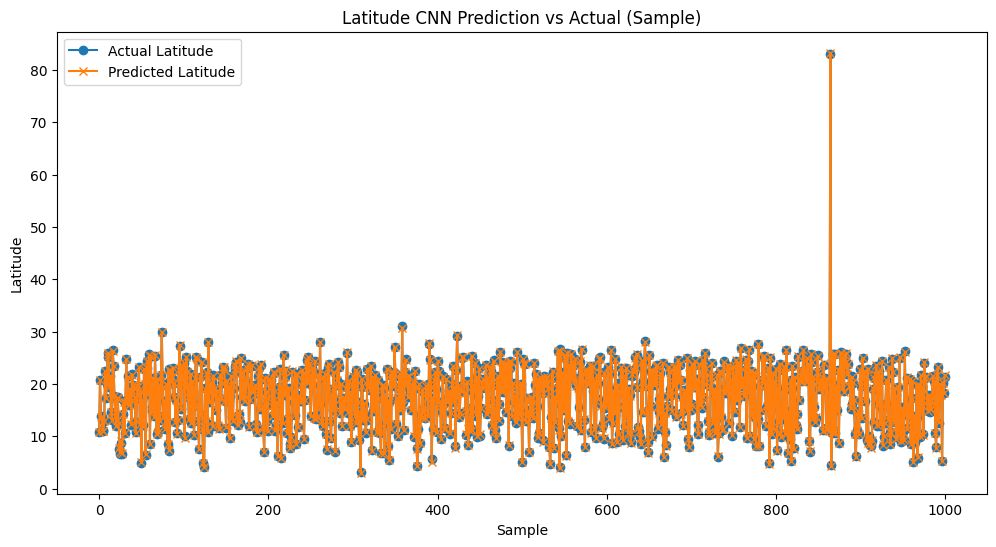

32/32 [==============================] - 0s 3ms/step


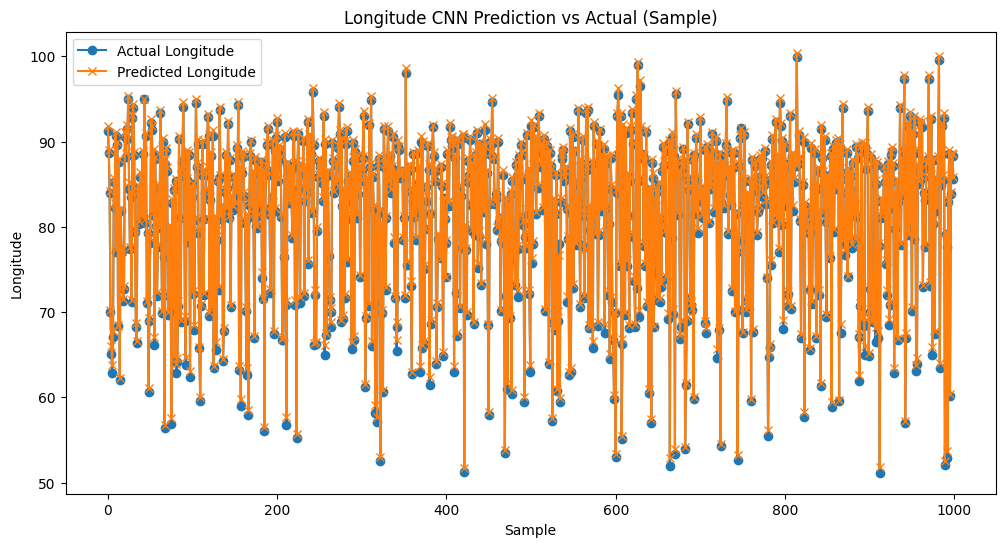

Latitude CNN Test Loss: 0.014954970218241215
Longitude CNN Test Loss: 0.18625938892364502


In [ ]:
import matplotlib.pyplot as plt

# Sample a subset of the test data for visualization
sample_indices = np.random.choice(len(X_test_cnn), size=1000, replace=False)
X_sample = X_test_cnn[sample_indices]
y_lat_sample = y_lat_test[sample_indices]
y_lon_sample = y_lon_test[sample_indices]

# Evaluate the latitude CNN model on the sample
test_loss_lat_cnn_sample = model_lat_cnn.evaluate(X_sample, y_lat_sample, verbose=0)
print('Latitude CNN Test Loss (Sample):', test_loss_lat_cnn_sample)

# Evaluate the longitude CNN model on the sample
test_loss_lon_cnn_sample = model_lon_cnn.evaluate(X_sample, y_lon_sample, verbose=0)
print('Longitude CNN Test Loss (Sample):', test_loss_lon_cnn_sample)

# Visualize latitude predictions on the sample
y_lat_pred_sample = model_lat_cnn.predict(X_sample).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lat_sample, label='Actual Latitude', marker='o')
plt.plot(y_lat_pred_sample, label='Predicted Latitude', marker='x')
plt.title('Latitude CNN Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualize longitude predictions on the sample
y_lon_pred_sample = model_lon_cnn.predict(X_sample).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lon_sample, label='Actual Longitude', marker='o')
plt.plot(y_lon_pred_sample, label='Predicted Longitude', marker='x')
plt.title('Longitude CNN Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Longitude')
plt.legend()
plt.show()

print('Latitude CNN Test Loss:', test_loss_lat_cnn)
print('Longitude CNN Test Loss:', test_loss_lon_cnn)


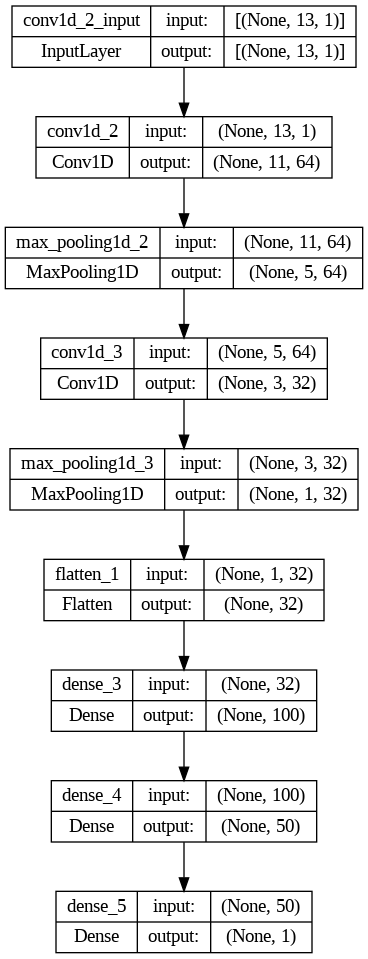

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


tf.keras.utils.plot_model(model_lon_cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
model_lat_cnn.save('lat_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for latitude CNN
y_lat_pred_cnn = model_lat_cnn.predict(X_test_cnn)
rmse_lat_cnn = np.sqrt(mean_squared_error(y_lat_test, y_lat_pred_cnn))
print('Latitude CNN Test RMSE:', rmse_lat_cnn)

# Calculate RMSE for longitude CNN
y_lon_pred_cnn = model_lon_cnn.predict(X_test_cnn)
rmse_lon_cnn = np.sqrt(mean_squared_error(y_lon_test, y_lon_pred_cnn))
print('Longitude CNN Test RMSE:', rmse_lon_cnn)


294/294 [==============================] - 1s 2ms/step
Latitude CNN Test RMSE: 0.12229052421672075
294/294 [==============================] - 1s 2ms/step
Longitude CNN Test RMSE: 0.4315779380608047


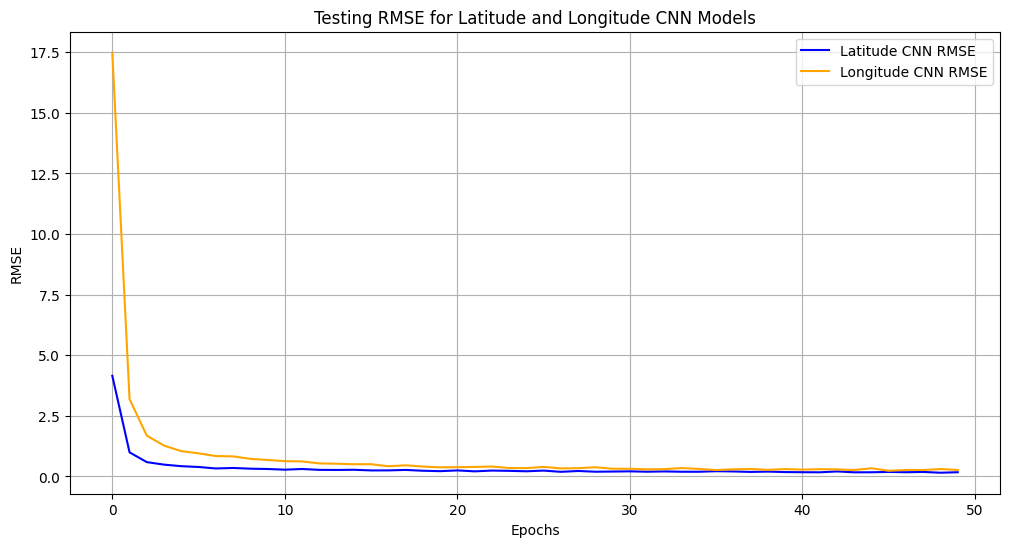

In [ ]:
import matplotlib.pyplot as plt

# Extract the RMSE values from the loss history for latitude and longitude CNN models
rmse_lat_cnn_test = np.sqrt(history_lat_cnn_dict['loss'])
rmse_lon_cnn_test = np.sqrt(history_lon_cnn_dict['loss'])

# Plot RMSE for Latitude and Longitude CNN models during testing
plt.figure(figsize=(12, 6))
plt.plot(rmse_lat_cnn_test, label='Latitude CNN RMSE', color='blue')
plt.plot(rmse_lon_cnn_test, label='Longitude CNN RMSE', color='orange')
plt.title('Testing RMSE for Latitude and Longitude CNN Models')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.savefig('/content/plotssaved/CNN_RMSE.png')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) for Latitude and Longitude CNN Models
mse_lat_cnn = mean_squared_error(y_lat_test, y_lat_pred_cnn)
mse_lon_cnn = mean_squared_error(y_lon_test, y_lon_pred_cnn)

# Calculate Mean Absolute Error (MAE) for Latitude and Longitude CNN Models
mae_lat_cnn = mean_absolute_error(y_lat_test, y_lat_pred_cnn)
mae_lon_cnn = mean_absolute_error(y_lon_test, y_lon_pred_cnn)

# Print MSE and MAE for Latitude and Longitude CNN Models
print('Latitude CNN MSE:', mse_lat_cnn)
print('Latitude CNN MAE:', mae_lat_cnn)
print('Longitude CNN MSE:', mse_lon_cnn)
print('Longitude CNN MAE:', mae_lon_cnn)

Latitude CNN MSE: 0.014954972313200365
Latitude CNN MAE: 0.08968616271299618
Longitude CNN MSE: 0.18625951662081577
Longitude CNN MAE: 0.4001911072630914


In [ ]:
# Create a copy of df_sorted to avoid modifying the original DataFrame
df_predicted = df_sorted.copy()
# Reshape input for prediction
X_predict_cnn = X.reshape((X.shape[0], X.shape[1], 1))

# Predict latitude for all instances
y_lat_predicted = model_lat_cnn.predict(X_predict_cnn)

# Predict longitude for all instances
y_lon_predicted = model_lon_cnn.predict(X_predict_cnn)

# Append predicted latitude and longitude to df_predicted DataFrame
df_predicted['CNN_latitude'] = y_lat_predicted
df_predicted['CNN_longitude'] = y_lon_predicted

# Print the updated DataFrame
df_predicted.head(10)

1470/1470 [==============================] - 2s 2ms/step


,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,...,ANGLE,DISTANCE_km,TIME_DIFFERENCE_hours,Hour_of_the_Day,Day_of_the_Week,Month,Season,Time_Since_Start,CNN_latitude,CNN_longitude
0,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 00:00:00,2,19.1000,88.3000,...,0.000000,0.000000,0.0,0.0,0.0,6.0,1.0,0.0,19.002893,88.585617
1,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 03:00:00,2,19.1667,88.1000,...,69.295411,22.281091,3.0,3.0,0.0,6.0,1.0,3.0,18.990755,88.347290
2,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 06:00:00,2,19.2602,87.8152,...,67.846901,31.660107,6.0,6.0,0.0,6.0,1.0,6.0,19.071743,88.092690
3,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 09:00:00,2,19.3574,87.5202,...,66.187321,32.789848,9.0,9.0,0.0,6.0,1.0,9.0,19.205883,87.843071
4,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 12:00:00,2,19.4502,87.2414,...,64.527110,31.007647,12.0,12.0,0.0,6.0,1.0,12.0,19.369192,87.576538
5,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 15:00:00,2,19.5462,86.9462,...,62.815630,32.731871,15.0,15.0,0.0,6.0,1.0,15.0,19.467001,87.297958
6,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 18:00:00,2,19.6506,86.6668,...,57.658604,31.486164,18.0,18.0,0.0,6.0,1.0,18.0,19.569666,87.001373
7,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 21:00:00,2,19.7734,86.4183,...,47.512085,29.378771,21.0,21.0,0.0,6.0,1.0,21.0,19.700468,86.673630
8,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-12 00:00:00,2,19.9209,86.1496,...,38.355494,32.539202,24.0,0.0,1.0,6.0,1.0,24.0,19.860764,86.328857
9,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-12 03:00:00,2,20.0925,85.8075,...,29.995080,40.518283,27.0,3.0,1.0,6.0,1.0,27.0,19.986746,85.949554


**CNN-GRU**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert selected features to numpy arrays
X = df_sorted[selected_features].values

# Standardize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the target variables
y_lat = df_sorted['LAT_degrees_north'].values
y_lon = df_sorted['LON_degrees_east'].values

# Split the data into train and test sets
X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(X, y_lat, y_lon, test_size=0.2, random_state=42)

# Reshape input for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN-GRU model with increased layers for latitude prediction
model_lat_cnn_gru = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    GRU(100, activation='relu', return_sequences=True),
    GRU(50, activation='relu', return_sequences=True),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the latitude model
model_lat_cnn_gru.compile(optimizer='adam', loss='mse')

# Train the latitude model
history_lat_cnn_gru = model_lat_cnn_gru.fit(X_train_cnn, y_lat_train, epochs=50, batch_size=32)
history_lat_dict_cnn_gru = history_lat_cnn_gru.history

# Evaluate the latitude model on the test set
test_loss_lat_cnn_gru = model_lat_cnn_gru.evaluate(X_test_cnn, y_lat_test, verbose=0)
print('Latitude Test Loss (CNN-GRU):', test_loss_lat_cnn_gru)
print(' ')

# Define the CNN-GRU model with increased layers for longitude prediction
model_lon_cnn_gru = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    GRU(100, activation='relu', return_sequences=True),
    GRU(50, activation='relu', return_sequences=True),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the longitude model
model_lon_cnn_gru.compile(optimizer='adam', loss='mse')

# Train the longitude model
history_lon_cnn_gru = model_lon_cnn_gru.fit(X_train_cnn, y_lon_train, epochs=50, batch_size=32)
history_lon_dict_cnn_gru = history_lon_cnn_gru.history

# Evaluate the longitude model on the test set
test_loss_lon_cnn_gru = model_lon_cnn_gru.evaluate(X_test_cnn, y_lon_test, verbose=0)
print('Longitude Test Loss (CNN-GRU):', test_loss_lon_cnn_gru)


Epoch 1/50
1176/1176 [==============================] - 15s 10ms/step - loss: 8.1336
Epoch 2/50
1176/1176 [==============================] - 24s 20ms/step - loss: 0.1689
Epoch 3/50
1176/1176 [==============================] - 18s 16ms/step - loss: 0.0977
Epoch 4/50
1176/1176 [==============================] - 21s 18ms/step - loss: 0.0838
Epoch 5/50
1176/1176 [==============================] - 21s 18ms/step - loss: 0.1540
Epoch 6/50
1176/1176 [==============================] - 21s 18ms/step - loss: 0.0548
Epoch 7/50
1176/1176 [==============================] - 13s 11ms/step - loss: 0.0636
Epoch 8/50
1176/1176 [==============================] - 12s 10ms/step - loss: 0.0766
Epoch 9/50
1176/1176 [==============================] - 20s 17ms/step - loss: 0.0656
Epoch 10/50
1176/1176 [==============================] - 26s 22ms/step - loss: 0.0270
Epoch 11/50
1176/1176 [==============================] - 21s 18ms/step - loss: 0.0719
Epoch 12/50
1176/1176 [==============================] - 13s 11

In [ ]:
model_lat_cnn_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 11, 64)            256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 gru (GRU)                   (None, 5, 100)            49800     
                                                                 
 gru_1 (GRU)                 (None, 5, 50)             22800     
                                                                 
 flatten_2 (Flatten)         (None, 250)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               25100     
                                                      

Latitude CNN-GRU Test Loss (Sample): 0.0036522892769426107
Longitude CNN-GRU Test Loss (Sample): 0.022078415378928185
294/294 [==============================] - 3s 9ms/step


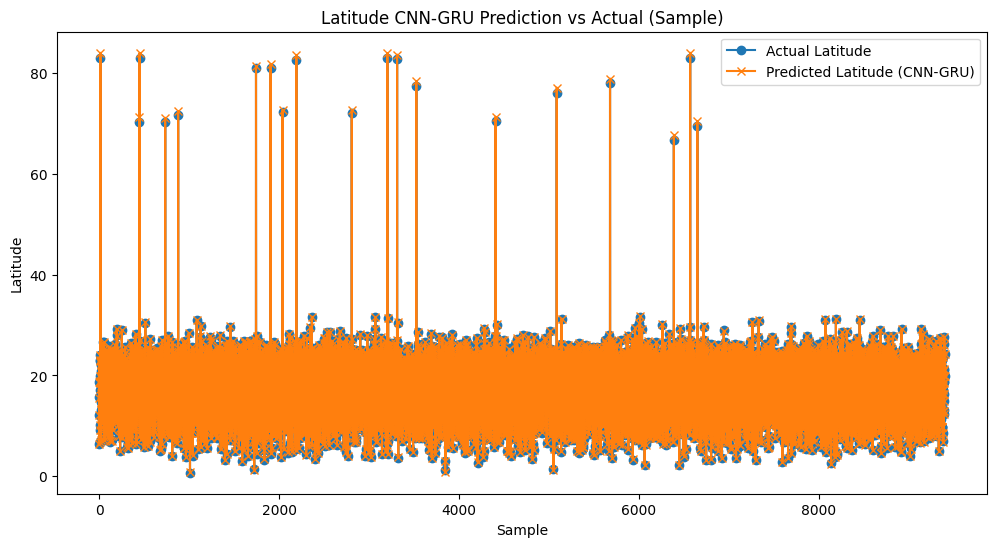

294/294 [==============================] - 2s 7ms/step


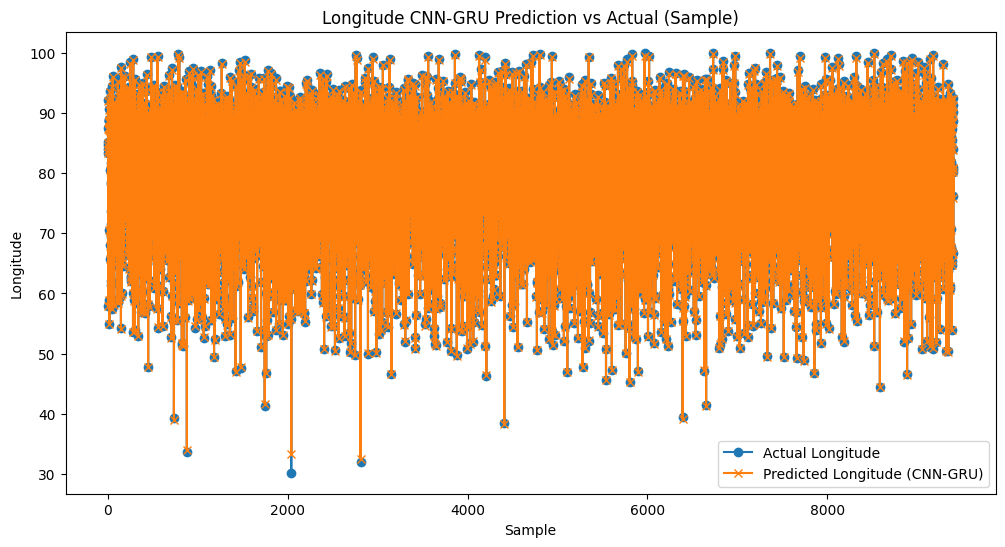

Latitude CNN-GRU Test Loss: 0.0036522892769426107
Longitude CNN-GRU Test Loss: 0.022078415378928185


In [ ]:
# Evaluate the latitude CNN-GRU model on the sample
test_loss_lat_cnn_gru_sample = model_lat_cnn_gru.evaluate(X_test_cnn, y_lat_test, verbose=0)
print('Latitude CNN-GRU Test Loss (Sample):', test_loss_lat_cnn_gru_sample)

# Evaluate the longitude CNN-GRU model on the sample
test_loss_lon_cnn_gru_sample = model_lon_cnn_gru.evaluate(X_test_cnn, y_lon_test, verbose=0)
print('Longitude CNN-GRU Test Loss (Sample):', test_loss_lon_cnn_gru_sample)

# Visualize latitude predictions on the sample for CNN-GRU
y_lat_pred_cnn_gru_sample = model_lat_cnn_gru.predict(X_test_cnn).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lat_test, label='Actual Latitude', marker='o')
plt.plot(y_lat_pred_cnn_gru_sample, label='Predicted Latitude (CNN-GRU)', marker='x')
plt.title('Latitude CNN-GRU Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualize longitude predictions on the sample for CNN-GRU
y_lon_pred_cnn_gru_sample = model_lon_cnn_gru.predict(X_test_cnn).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lon_test, label='Actual Longitude', marker='o')
plt.plot(y_lon_pred_cnn_gru_sample, label='Predicted Longitude (CNN-GRU)', marker='x')
plt.title('Longitude CNN-GRU Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Longitude')
plt.legend()
plt.show()

print('Latitude CNN-GRU Test Loss:', test_loss_lat_cnn_gru)
print('Longitude CNN-GRU Test Loss:', test_loss_lon_cnn_gru)


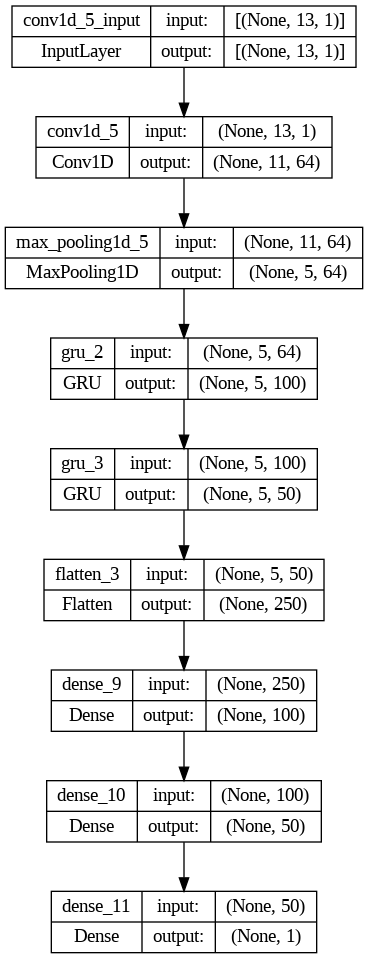

In [ ]:
tf.keras.utils.plot_model(model_lon_cnn_gru, to_file='model_plot_cnn_gru.png', show_shapes=True, show_layer_names=True)


In [ ]:
model_lat_cnn_gru.save('lat_cnn_gru_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_lon_cnn_gru.save('lat_cnn_gru_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Calculate RMSE for latitude (CNN-GRU)
y_lat_pred_cnn_gru = model_lat_cnn_gru.predict(X_test_cnn)
rmse_lat_cnn_gru = np.sqrt(mean_squared_error(y_lat_test, y_lat_pred_cnn_gru))
print('Latitude Test RMSE (CNN-GRU):', rmse_lat_cnn_gru)

# Calculate RMSE for longitude (CNN-GRU)
y_lon_pred_cnn_gru = model_lon_cnn_gru.predict(X_test_cnn)
rmse_lon_cnn_gru = np.sqrt(mean_squared_error(y_lon_test, y_lon_pred_cnn_gru))
print('Longitude Test RMSE (CNN-GRU):', rmse_lon_cnn_gru)


294/294 [==============================] - 1s 3ms/step
Latitude Test RMSE (CNN-GRU): 0.060434173389207806
294/294 [==============================] - 1s 3ms/step
Longitude Test RMSE (CNN-GRU): 0.14858800488750049


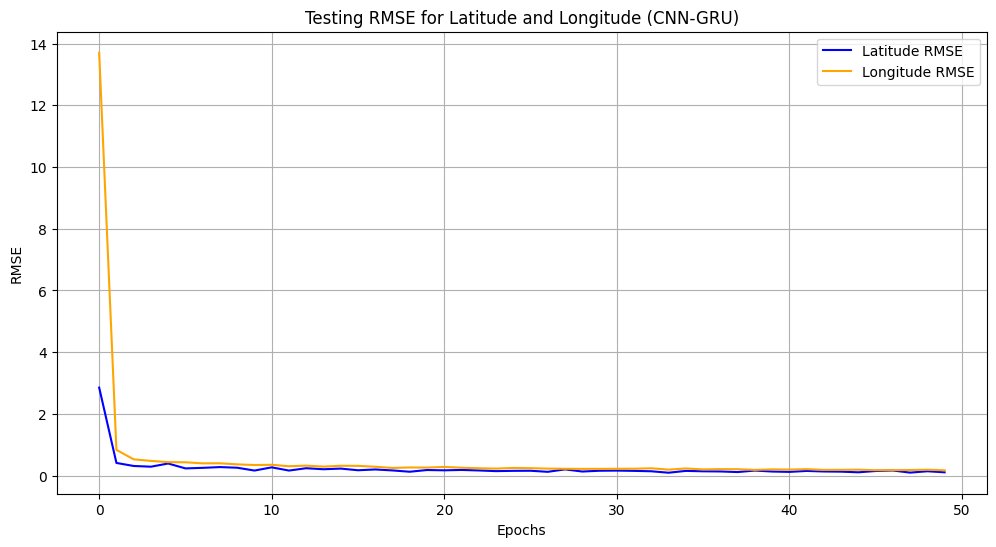

In [ ]:
import matplotlib.pyplot as plt

# Extract the RMSE values from the loss history
rmse_lat_test = np.sqrt(history_lat_dict_cnn_gru['loss'])
rmse_lon_test = np.sqrt(history_lon_dict_cnn_gru['loss'])

# Plot RMSE for Latitude and Longitude during testing
plt.figure(figsize=(12, 6))
plt.plot(rmse_lat_test, label='Latitude RMSE', color='blue')
plt.plot(rmse_lon_test, label='Longitude RMSE', color='orange')
plt.title('Testing RMSE for Latitude and Longitude (CNN-GRU)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.savefig('/content/plotssaved/CNN-GRU_RMSE.png')
plt.show()


In [ ]:
# Calculate MSE and MAE for latitude and longitude (CNN-GRU)
mse_lat_cnn_gru = mean_squared_error(y_lat_test, y_lat_pred_cnn_gru)
mse_lon_cnn_gru = mean_squared_error(y_lon_test, y_lon_pred_cnn_gru)
mae_lat_cnn_gru = mean_absolute_error(y_lat_test, y_lat_pred_cnn_gru)
mae_lon_cnn_gru = mean_absolute_error(y_lon_test, y_lon_pred_cnn_gru)

# Print MSE and MAE for Latitude and Longitude (CNN-GRU)
print('Latitude MSE (CNN-GRU):', mse_lat_cnn_gru)
print('Latitude MAE (CNN-GRU):', mae_lat_cnn_gru)
print('Longitude MSE (CNN-GRU):', mse_lon_cnn_gru)
print('Longitude MAE (CNN-GRU):', mae_lon_cnn_gru)

Latitude MSE (CNN-GRU): 0.003652289313236833
Latitude MAE (CNN-GRU): 0.03810793841902276
Longitude MSE (CNN-GRU): 0.02207839519644787
Longitude MAE (CNN-GRU): 0.13433123176085443


In [ ]:

# Reshape input for prediction
X_predict_cnn = X.reshape((X.shape[0], X.shape[1], 1))

# Predict latitude for all instances
y_lat_predicted = model_lat_cnn_gru.predict(X_predict_cnn)

# Predict longitude for all instances
y_lon_predicted = model_lon_cnn_gru.predict(X_predict_cnn)

# Append predicted latitude and longitude to df_predicted DataFrame
df_predicted['CNN_GRU_latitude'] = y_lat_predicted
df_predicted['CNN_GRU_longitude'] = y_lon_predicted

# Print the updated DataFrame
df_predicted.head(10)


1470/1470 [==============================] - 5s 3ms/step


,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,...,TIME_DIFFERENCE_hours,Hour_of_the_Day,Day_of_the_Week,Month,Season,Time_Since_Start,CNN_latitude,CNN_longitude,CNN_GRU_latitude,CNN_GRU_longitude
0,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 00:00:00,2,19.1000,88.3000,...,0.0,0.0,0.0,6.0,1.0,0.0,19.002893,88.585617,19.004250,88.150047
1,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 03:00:00,2,19.1667,88.1000,...,3.0,3.0,0.0,6.0,1.0,3.0,18.990755,88.347290,19.095123,87.959969
2,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 06:00:00,2,19.2602,87.8152,...,6.0,6.0,0.0,6.0,1.0,6.0,19.071743,88.092690,19.202682,87.678200
3,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 09:00:00,2,19.3574,87.5202,...,9.0,9.0,0.0,6.0,1.0,9.0,19.205883,87.843071,19.306202,87.384140
4,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 12:00:00,2,19.4502,87.2414,...,12.0,12.0,0.0,6.0,1.0,12.0,19.369192,87.576538,19.424809,87.099731
5,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 15:00:00,2,19.5462,86.9462,...,15.0,15.0,0.0,6.0,1.0,15.0,19.467001,87.297958,19.532896,86.806999
6,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 18:00:00,2,19.6506,86.6668,...,18.0,18.0,0.0,6.0,1.0,18.0,19.569666,87.001373,19.626837,86.545692
7,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 21:00:00,2,19.7734,86.4183,...,21.0,21.0,0.0,6.0,1.0,21.0,19.700468,86.673630,19.757900,86.293274
8,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-12 00:00:00,2,19.9209,86.1496,...,24.0,0.0,1.0,6.0,1.0,24.0,19.860764,86.328857,19.903927,86.014656
9,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-12 03:00:00,2,20.0925,85.8075,...,27.0,3.0,1.0,6.0,1.0,27.0,19.986746,85.949554,20.067696,85.662674


**MLP**

In [ ]:
from tensorflow.keras.layers import Dense

# Define the MLP model with 4 hidden layers for latitude prediction
model_lat_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

# Compile the latitude MLP model
model_lat_mlp.compile(optimizer='adam', loss='mse')

# Train the latitude MLP model
history_lat_mlp = model_lat_mlp.fit(X_train, y_lat_train, epochs=50, batch_size=32)
history_lat_mlp_dict = history_lat_mlp.history

test_loss_lat_mlp = model_lat_mlp.evaluate(X_test, y_lat_test, verbose=0)
print('Latitude Test Loss (MLP):', test_loss_lat_mlp)
print(' ')

# Define the MLP model with 4 hidden layers for longitude prediction
model_lon_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])

# Compile the longitude MLP model
model_lon_mlp.compile(optimizer='adam', loss='mse')

# Train the longitude MLP model
history_lon_mlp = model_lon_mlp.fit(X_train, y_lon_train, epochs=50, batch_size=32)
history_lon_mlp_dict = history_lon_mlp.history

# Evaluate the longitude MLP model on the test set
test_loss_lon_mlp = model_lon_mlp.evaluate(X_test, y_lon_test, verbose=0)
print('Longitude Test Loss (MLP):', test_loss_lon_mlp)

Epoch 1/50
1176/1176 [==============================] - 3s 2ms/step - loss: 14.1517
Epoch 2/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.1439
Epoch 3/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.0592
Epoch 4/50
1176/1176 [==============================] - 3s 3ms/step - loss: 0.0355
Epoch 5/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.0253
Epoch 6/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.0220
Epoch 7/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.0272
Epoch 8/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 9/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.0159
Epoch 10/50
1176/1176 [==============================] - 3s 3ms/step - loss: 0.0099
Epoch 11/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.0124
Epoch 12/50
1176/1176 [==============================] - 2s 2ms/step - loss: 0.0127


In [ ]:
model_lon_mlp.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                896       
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Latitude MLP Test Loss (Sample): 0.002560859313234687
Longitude MLP Test Loss (Sample): 0.02139522321522236
294/294 [==============================] - 1s 2ms/step


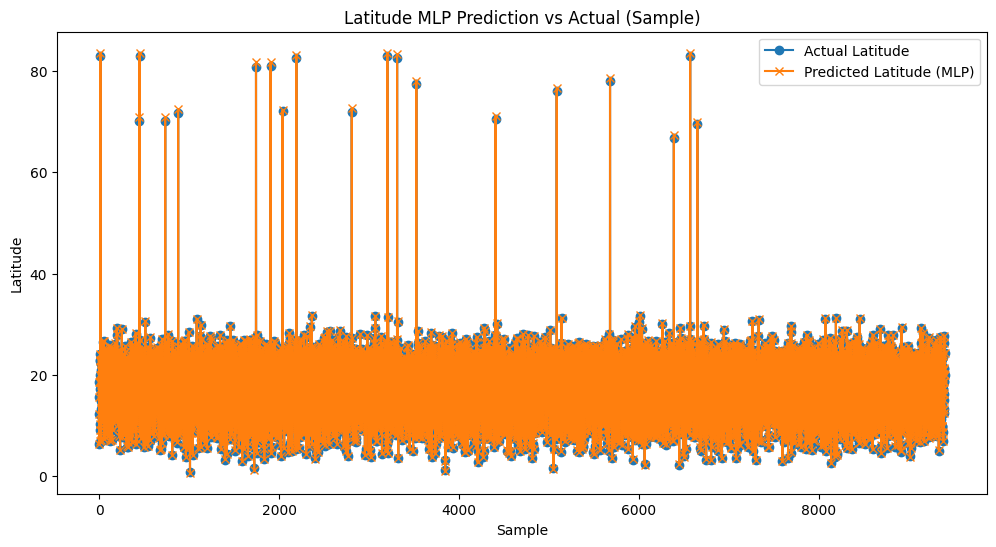

294/294 [==============================] - 1s 2ms/step


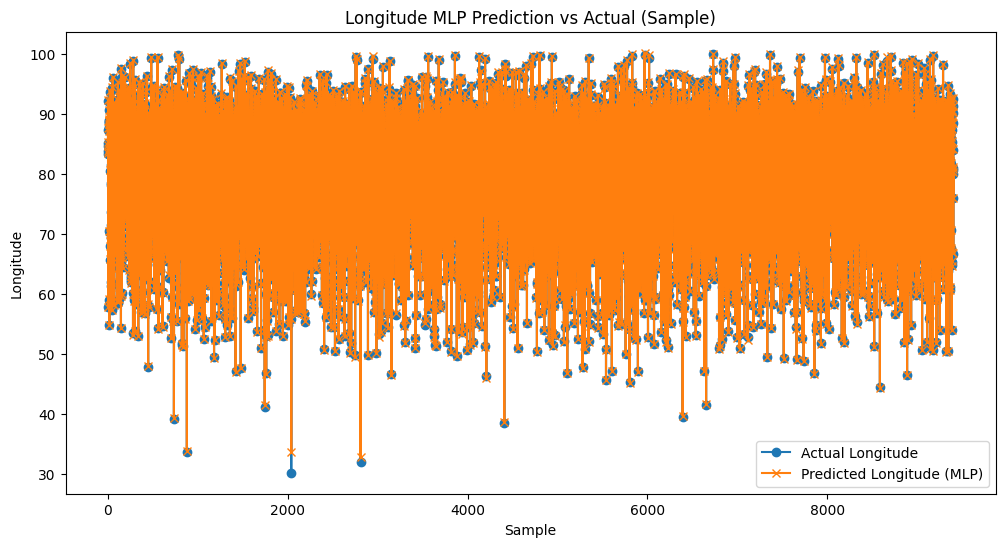

Latitude MLP Test Loss: 0.002560859313234687
Longitude MLP Test Loss: 0.02139522321522236


In [ ]:
# Evaluate the latitude MLP model on the sample
test_loss_lat_mlp_sample = model_lat_mlp.evaluate(X_test, y_lat_test, verbose=0)
print('Latitude MLP Test Loss (Sample):', test_loss_lat_mlp_sample)

# Evaluate the longitude MLP model on the sample
test_loss_lon_mlp_sample = model_lon_mlp.evaluate(X_test, y_lon_test, verbose=0)
print('Longitude MLP Test Loss (Sample):', test_loss_lon_mlp_sample)

# Visualize latitude predictions on the sample for MLP
y_lat_pred_mlp_sample = model_lat_mlp.predict(X_test).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lat_test, label='Actual Latitude', marker='o')
plt.plot(y_lat_pred_mlp_sample, label='Predicted Latitude (MLP)', marker='x')
plt.title('Latitude MLP Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualize longitude predictions on the sample for MLP
y_lon_pred_mlp_sample = model_lon_mlp.predict(X_test).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lon_test, label='Actual Longitude', marker='o')
plt.plot(y_lon_pred_mlp_sample, label='Predicted Longitude (MLP)', marker='x')
plt.title('Longitude MLP Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Longitude')
plt.legend()
plt.show()

print('Latitude MLP Test Loss:', test_loss_lat_mlp)
print('Longitude MLP Test Loss:', test_loss_lon_mlp)


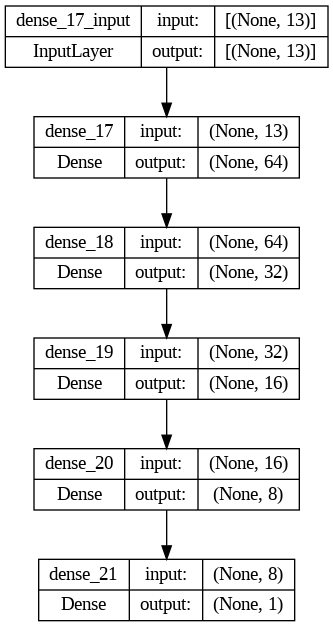

In [ ]:
tf.keras.utils.plot_model(model_lon_mlp, to_file='model_plot_mlp.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_lat_mlp.save('lat_mlp_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_lon_mlp.save('lon_mlp_model.h5')

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for latitude
y_lat_pred = model_lat_mlp.predict(X_test_cnn)
rmse_lat = np.sqrt(mean_squared_error(y_lat_test, y_lat_pred))
print('Latitude Test RMSE:', rmse_lat)

# Calculate RMSE for longitude
y_lon_pred = model_lon_mlp.predict(X_test_cnn)
rmse_lon = np.sqrt(mean_squared_error(y_lon_test, y_lon_pred))
print('Longitude Test RMSE:', rmse_lon)

294/294 [==============================] - 0s 1ms/step
Latitude Test RMSE: 0.0506049336809022
294/294 [==============================] - 1s 2ms/step
Longitude Test RMSE: 0.14627113382003265


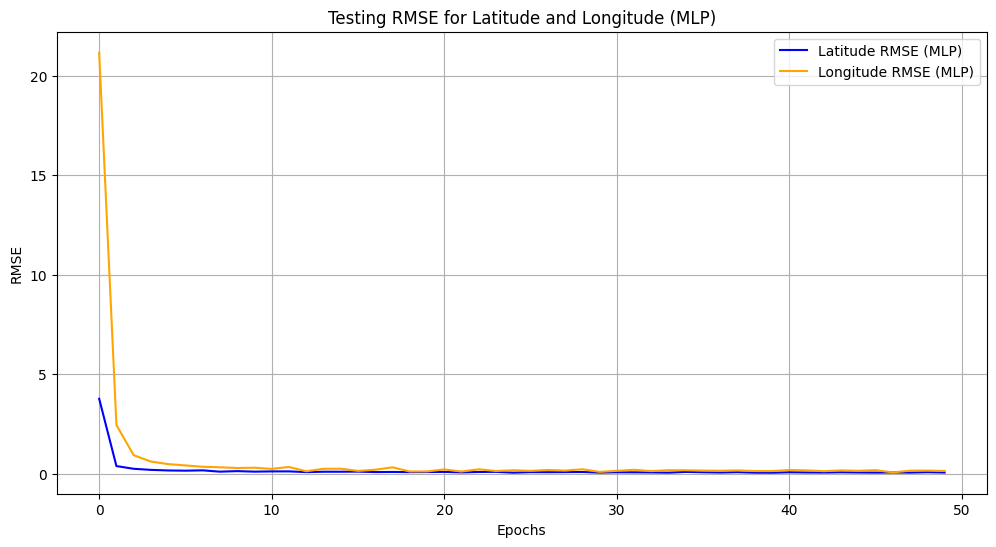

In [ ]:
# Extract the RMSE values from the loss history for latitude and longitude MLP models
rmse_lat_mlp_test = np.sqrt(history_lat_mlp_dict['loss'])
rmse_lon_mlp_test = np.sqrt(history_lon_mlp_dict['loss'])

# Plot RMSE for Latitude and Longitude MLP models during testing
plt.figure(figsize=(12, 6))
plt.plot(rmse_lat_mlp_test, label='Latitude RMSE (MLP)', color='blue')
plt.plot(rmse_lon_mlp_test, label='Longitude RMSE (MLP)', color='orange')
plt.title('Testing RMSE for Latitude and Longitude (MLP)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.savefig('/content/plotssaved/MLP_RMSE.png')

plt.show()

In [ ]:
X_predict_mlp = X.reshape((X.shape[0], X.shape[1], 1))

# Predict latitude for all instances
y_lat_predicted = model_lat_mlp.predict(X_predict_mlp)

# Predict longitude for all instances
y_lon_predicted = model_lon_mlp.predict(X_predict_mlp)

# Append predicted latitude and longitude to df_predicted DataFrame
df_predicted['MLP_latitude'] = y_lat_predicted
df_predicted['MLP_longitude'] = y_lon_predicted

# Print the updated DataFrame
df_predicted.head(10)

1470/1470 [==============================] - 2s 1ms/step


,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,...,Day_of_the_Week,Month,Season,Time_Since_Start,CNN_latitude,CNN_longitude,CNN_GRU_latitude,CNN_GRU_longitude,MLP_latitude,MLP_longitude
0,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 00:00:00,2,19.1000,88.3000,...,0.0,6.0,1.0,0.0,19.002893,88.585617,19.004250,88.150047,19.181009,88.413445
1,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 03:00:00,2,19.1667,88.1000,...,0.0,6.0,1.0,3.0,18.990755,88.347290,19.095123,87.959969,19.229584,88.209572
2,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 06:00:00,2,19.2602,87.8152,...,0.0,6.0,1.0,6.0,19.071743,88.092690,19.202682,87.678200,19.318932,87.924225
3,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 09:00:00,2,19.3574,87.5202,...,0.0,6.0,1.0,9.0,19.205883,87.843071,19.306202,87.384140,19.413635,87.623680
4,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 12:00:00,2,19.4502,87.2414,...,0.0,6.0,1.0,12.0,19.369192,87.576538,19.424809,87.099731,19.502995,87.341171
5,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 15:00:00,2,19.5462,86.9462,...,0.0,6.0,1.0,15.0,19.467001,87.297958,19.532896,86.806999,19.595873,87.043549
6,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 18:00:00,2,19.6506,86.6668,...,0.0,6.0,1.0,18.0,19.569666,87.001373,19.626837,86.545692,19.697535,86.757759
7,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 21:00:00,2,19.7734,86.4183,...,0.0,6.0,1.0,21.0,19.700468,86.673630,19.757900,86.293274,19.820526,86.505875
8,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-12 00:00:00,2,19.9209,86.1496,...,1.0,6.0,1.0,24.0,19.860764,86.328857,19.903927,86.014656,19.968277,86.235756
9,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-12 03:00:00,2,20.0925,85.8075,...,1.0,6.0,1.0,27.0,19.986746,85.949554,20.067696,85.662674,20.141893,85.895744


**LSTM**

In [ ]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model with reduced complexity for latitude prediction
model_lat_lstm = Sequential([
    LSTM(32, activation='relu', return_sequences=True, input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    LSTM(16, activation='relu'),
    Dense(1)
])

# Compile the latitude LSTM model
model_lat_lstm.compile(optimizer='adam', loss='mse')

# Train the latitude LSTM model with reduced complexity
history_lat_lstm = model_lat_lstm.fit(X_train_cnn, y_lat_train, epochs=50, batch_size=32, verbose=1)
history_lat_lstm_dict = history_lat_lstm.history

# Evaluate the latitude LSTM model on the test set
test_loss_lat_lstm = model_lat_lstm.evaluate(X_test_cnn, y_lat_test, verbose=0)
print('Latitude LSTM Test Loss:', test_loss_lat_lstm)

# Define the LSTM model with reduced complexity for longitude prediction
model_lon_lstm = Sequential([
    LSTM(32, activation='relu', return_sequences=True, input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    LSTM(16, activation='relu'),
    Dense(1)
])

# Compile the longitude LSTM model
model_lon_lstm.compile(optimizer='adam', loss='mse')

# Train the longitude LSTM model with reduced complexity
history_lon_lstm = model_lon_lstm.fit(X_train_cnn, y_lon_train, epochs=50, batch_size=32, verbose=1)
history_lon_lstm_dict = history_lon_lstm.history

# Evaluate the longitude LSTM model on the test set
test_loss_lon_lstm = model_lon_lstm.evaluate(X_test_cnn, y_lon_test, verbose=0)
print('Longitude LSTM Test Loss:', test_loss_lon_lstm)


Epoch 1/50
1176/1176 [==============================] - 18s 13ms/step - loss: 34.6572
Epoch 2/50
1176/1176 [==============================] - 19s 16ms/step - loss: 1.7235
Epoch 3/50
1176/1176 [==============================] - 15s 13ms/step - loss: 0.2794
Epoch 4/50
1176/1176 [==============================] - 14s 11ms/step - loss: 0.1860
Epoch 5/50
1176/1176 [==============================] - 13s 11ms/step - loss: 0.1678
Epoch 6/50
1176/1176 [==============================] - 13s 11ms/step - loss: 0.1303
Epoch 7/50
1176/1176 [==============================] - 13s 11ms/step - loss: 0.1621
Epoch 8/50
1176/1176 [==============================] - 14s 12ms/step - loss: 0.1718
Epoch 9/50
1176/1176 [==============================] - 14s 12ms/step - loss: 0.0806
Epoch 10/50
1176/1176 [==============================] - 13s 11ms/step - loss: 0.1006
Epoch 11/50
1176/1176 [==============================] - 15s 13ms/step - loss: 0.1062
Epoch 12/50
1176/1176 [==============================] - 14s 1

In [ ]:
model_lat_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense_22 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7505 (29.32 KB)
Trainable params: 7505 (29.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Latitude LSTM Test Loss (Sample): 0.003395773470401764
Longitude LSTM Test Loss (Sample): 0.2639524042606354
294/294 [==============================] - 1s 3ms/step


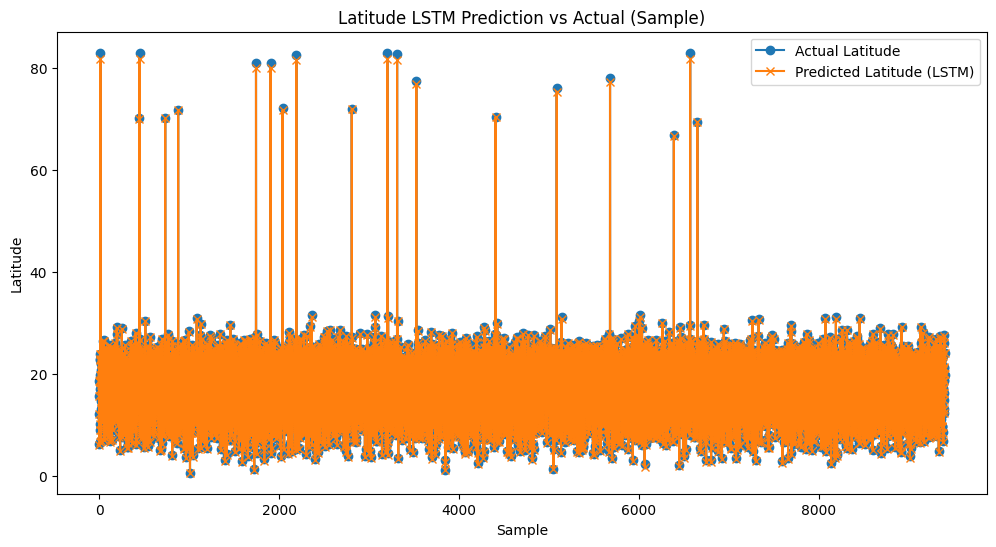

294/294 [==============================] - 1s 5ms/step


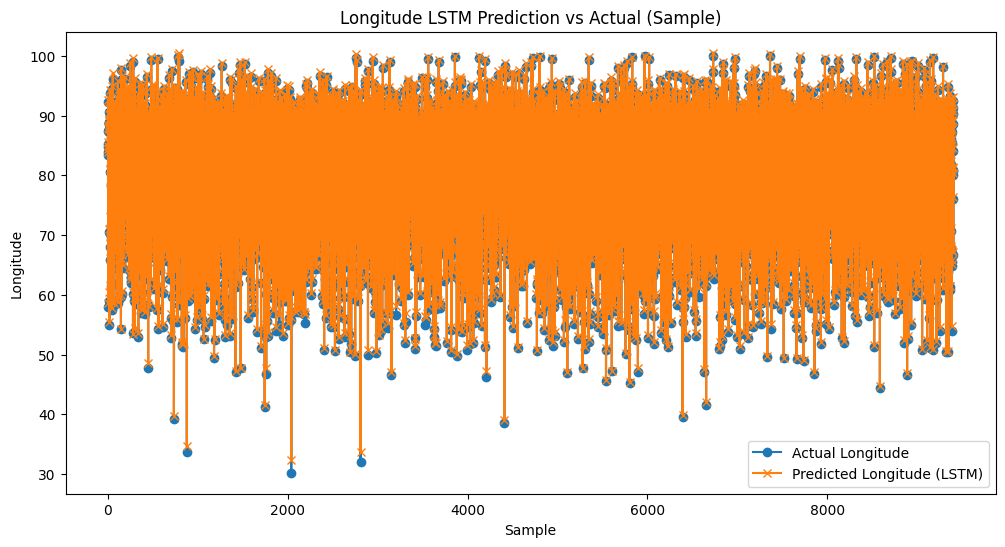

Latitude LSTM Test Loss: 0.003395773470401764
Longitude LSTM Test Loss: 0.2639524042606354


In [ ]:
# Evaluate the latitude LSTM model on the sample
test_loss_lat_lstm_sample = model_lat_lstm.evaluate(X_test_cnn, y_lat_test, verbose=0)
print('Latitude LSTM Test Loss (Sample):', test_loss_lat_lstm_sample)

# Evaluate the longitude LSTM model on the sample
test_loss_lon_lstm_sample = model_lon_lstm.evaluate(X_test_cnn, y_lon_test, verbose=0)
print('Longitude LSTM Test Loss (Sample):', test_loss_lon_lstm_sample)

# Visualize latitude predictions on the sample for LSTM
y_lat_pred_lstm_sample = model_lat_lstm.predict(X_test_cnn).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lat_test, label='Actual Latitude', marker='o')
plt.plot(y_lat_pred_lstm_sample, label='Predicted Latitude (LSTM)', marker='x')
plt.title('Latitude LSTM Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualize longitude predictions on the sample for LSTM
y_lon_pred_lstm_sample = model_lon_lstm.predict(X_test_cnn).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lon_test, label='Actual Longitude', marker='o')
plt.plot(y_lon_pred_lstm_sample, label='Predicted Longitude (LSTM)', marker='x')
plt.title('Longitude LSTM Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Longitude')
plt.legend()
plt.show()

print('Latitude LSTM Test Loss:', test_loss_lat_lstm)
print('Longitude LSTM Test Loss:', test_loss_lon_lstm)


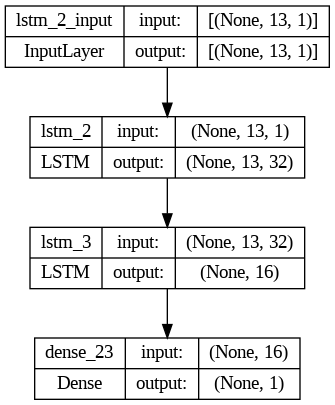

In [ ]:
tf.keras.utils.plot_model(model_lon_lstm, to_file='model_plot_lstm.png', show_shapes=True, show_layer_names=True)


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for latitude LSTM
y_lat_pred_lstm = model_lat_lstm.predict(X_test_cnn)
rmse_lat_lstm = np.sqrt(mean_squared_error(y_lat_test, y_lat_pred_lstm))
print('Latitude LSTM Test RMSE:', rmse_lat_lstm)

# Calculate RMSE for longitude LSTM
y_lon_pred_lstm = model_lon_lstm.predict(X_test_cnn)
rmse_lon_lstm = np.sqrt(mean_squared_error(y_lon_test, y_lon_pred_lstm))
print('Longitude LSTM Test RMSE:', rmse_lon_lstm)


294/294 [==============================] - 1s 4ms/step
Latitude LSTM Test RMSE: 0.058273304878117334
294/294 [==============================] - 1s 4ms/step
Longitude LSTM Test RMSE: 0.5137631339167283


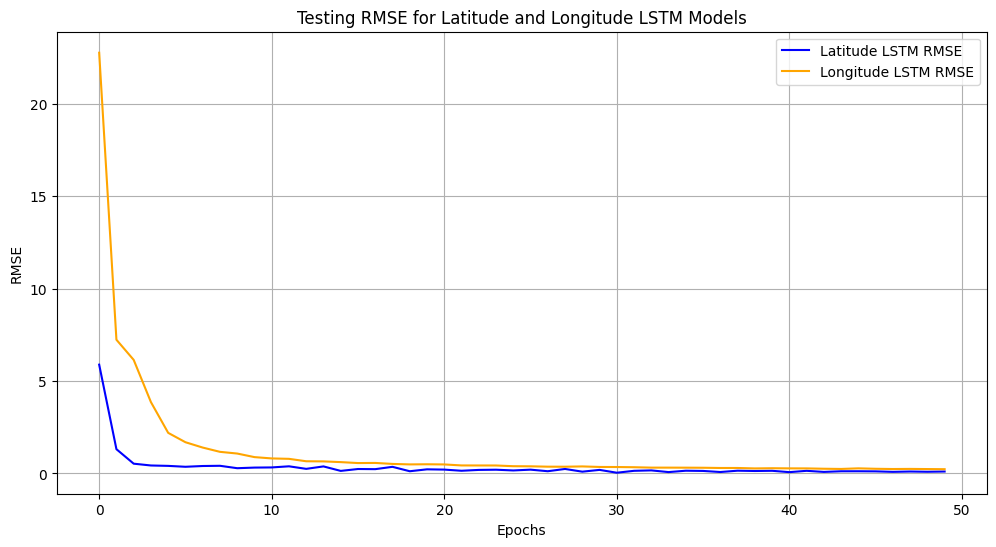

In [ ]:
import matplotlib.pyplot as plt

# Extract the RMSE values from the loss history for latitude and longitude LSTM models
rmse_lat_lstm_test = np.sqrt(history_lat_lstm_dict['loss'])
rmse_lon_lstm_test = np.sqrt(history_lon_lstm_dict['loss'])

# Plot RMSE for Latitude and Longitude LSTM models during testing
plt.figure(figsize=(12, 6))
plt.plot(rmse_lat_lstm_test, label='Latitude LSTM RMSE', color='blue')
plt.plot(rmse_lon_lstm_test, label='Longitude LSTM RMSE', color='orange')
plt.title('Testing RMSE for Latitude and Longitude LSTM Models')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.savefig('/content/plotssaved/LSTM_RMSE.png')

plt.show()




In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) for Latitude and Longitude LSTM Models
mse_lat_lstm = mean_squared_error(y_lat_test, y_lat_pred_lstm)
mse_lon_lstm = mean_squared_error(y_lon_test, y_lon_pred_lstm)

# Calculate Mean Absolute Error (MAE) for Latitude and Longitude LSTM Models
mae_lat_lstm = mean_absolute_error(y_lat_test, y_lat_pred_lstm)
mae_lon_lstm = mean_absolute_error(y_lon_test, y_lon_pred_lstm)

# Print MSE and MAE for Latitude and Longitude LSTM Models
print('Latitude LSTM MSE:', mse_lat_lstm)
print('Latitude LSTM MAE:', mae_lat_lstm)
print('Longitude LSTM MSE:', mse_lon_lstm)
print('Longitude LSTM MAE:', mae_lon_lstm)

Latitude LSTM MSE: 0.003395778061418014
Latitude LSTM MAE: 0.030856716089890674
Longitude LSTM MSE: 0.2639525577719381
Longitude LSTM MAE: 0.5024667449065148


In [ ]:


# Predict latitude for all instances
y_lat_predicted = model_lat_lstm.predict(X_predict_cnn)

# Predict longitude for all instances
y_lon_predicted = model_lon_lstm.predict(X_predict_cnn)

# Append predicted latitude and longitude to df_predicted DataFrame
df_predicted['LSTM_latitude'] = y_lat_predicted
df_predicted['LSTM_longitude'] = y_lon_predicted

# Print the updated DataFrame
print(df_predicted.head(10))


1470/1470 [==============================] - 7s 5ms/step
           SID_   SEASON_Year  NUMBER_  BASIN_   SUBBASIN_      NAME_   \
0  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
1  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
2  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
3  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
4  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
5  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
6  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
7  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
8  1900162N19088         1900       8.0      NI           1  NOT_NAMED   
9  1900162N19088         1900       8.0      NI           1  NOT_NAMED   

           ISO_TIME_   NATURE_   LAT_degrees_north  LON_degrees_east  ...  \
0 1900-06-11 00:00:00         2            19.1000 

**CNN-LSTM**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM

# Define the CNN-LSTM model with 4 layers for latitude prediction
model_lat_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(16, activation='relu', return_sequences=True),
    LSTM(8, activation='relu'),
    Dense(1)
])

# Compile the latitude CNN-LSTM model
model_lat_cnn_lstm.compile(optimizer='adam', loss='mse')

# Train the latitude CNN-LSTM model
history_lat_cnn_lstm = model_lat_cnn_lstm.fit(X_train_cnn, y_lat_train, epochs=50, batch_size=32)
history_lat_cnn_lstm_dict = history_lat_cnn_lstm.history

# Evaluate the latitude CNN-LSTM model on the test set
test_loss_lat_cnn_lstm = model_lat_cnn_lstm.evaluate(X_test_cnn, y_lat_test, verbose=0)
print('Latitude CNN-LSTM Test Loss:', test_loss_lat_cnn_lstm)

# Define the CNN-LSTM model with 4 layers for longitude prediction
model_lon_cnn_lstm = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(32, activation='relu', return_sequences=True),
    LSTM(16, activation='relu', return_sequences=True),
    LSTM(8, activation='relu'),
    Dense(1)
])

# Compile the longitude CNN-LSTM model
model_lon_cnn_lstm.compile(optimizer='adam', loss='mse')

# Train the longitude CNN-LSTM model
history_lon_cnn_lstm = model_lon_cnn_lstm.fit(X_train_cnn, y_lon_train, epochs=50, batch_size=32)
history_lon_cnn_lstm_dict = history_lon_cnn_lstm.history

# Evaluate the longitude CNN-LSTM model on the test set
test_loss_lon_cnn_lstm = model_lon_cnn_lstm.evaluate(X_test_cnn, y_lon_test, verbose=0)
print('Longitude CNN-LSTM Test Loss:', test_loss_lon_cnn_lstm)


Epoch 1/50
1176/1176 [==============================] - 19s 11ms/step - loss: 22.3012
Epoch 2/50
1176/1176 [==============================] - 16s 13ms/step - loss: 0.5231
Epoch 3/50
1176/1176 [==============================] - 7s 6ms/step - loss: 0.2798
Epoch 4/50
1176/1176 [==============================] - 9s 8ms/step - loss: 0.2060
Epoch 5/50
1176/1176 [==============================] - 8s 7ms/step - loss: 0.1657
Epoch 6/50
1176/1176 [==============================] - 10s 8ms/step - loss: 0.1507
Epoch 7/50
1176/1176 [==============================] - 9s 8ms/step - loss: 0.1149
Epoch 8/50
1176/1176 [==============================] - 8s 7ms/step - loss: 0.0987
Epoch 9/50
1176/1176 [==============================] - 9s 7ms/step - loss: 0.1026
Epoch 10/50
1176/1176 [==============================] - 9s 8ms/step - loss: 0.0875
Epoch 11/50
1176/1176 [==============================] - 7s 6ms/step - loss: 0.0804
Epoch 12/50
1176/1176 [==============================] - 9s 7ms/step - loss: 0.

In [ ]:
model_lon_cnn_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 11, 64)            256       
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 5, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 3, 32)             6176      
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 1, 32)             0         
 g1D)                                                            
                                                                 
 lstm_8 (LSTM)               (None, 1, 64)             24832     
                                                                 
 lstm_9 (LSTM)               (None, 1, 32)            

Latitude CNN-LSTM Test Loss (Sample): 0.026875056326389313
Longitude CNN-LSTM Test Loss (Sample): 0.036904167383909225
294/294 [==============================] - 1s 3ms/step


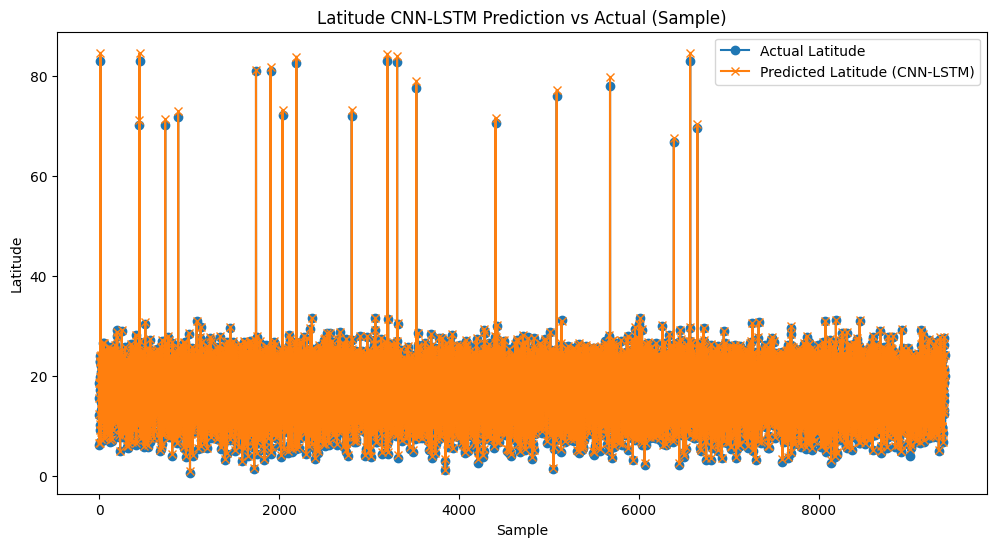

294/294 [==============================] - 1s 2ms/step


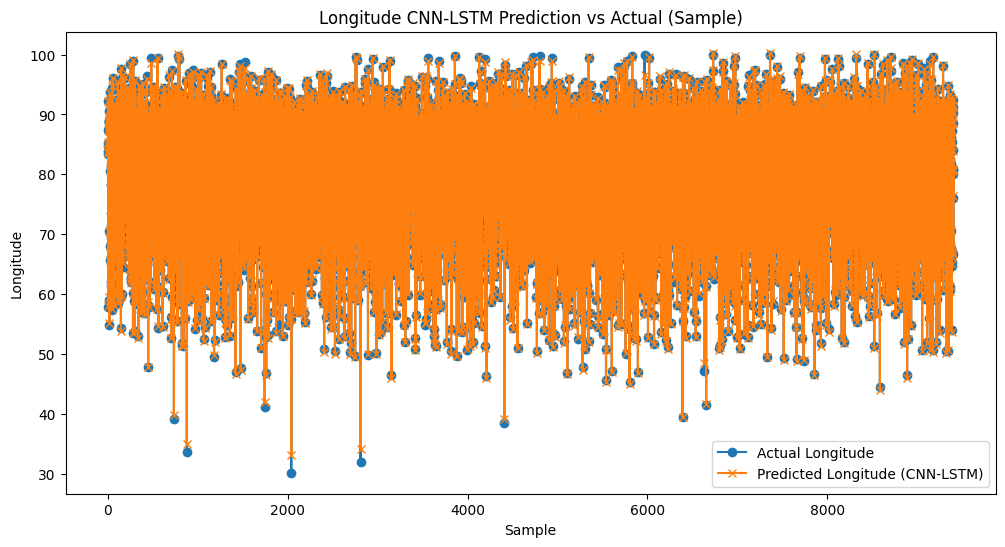

Latitude CNN-LSTM Test Loss: 0.026875056326389313
Longitude CNN-LSTM Test Loss: 0.036904167383909225


In [ ]:
# Evaluate the latitude CNN-LSTM model on the sample
test_loss_lat_cnn_lstm_sample = model_lat_cnn_lstm.evaluate(X_test_cnn, y_lat_test, verbose=0)
print('Latitude CNN-LSTM Test Loss (Sample):', test_loss_lat_cnn_lstm_sample)

# Evaluate the longitude CNN-LSTM model on the sample
test_loss_lon_cnn_lstm_sample = model_lon_cnn_lstm.evaluate(X_test_cnn, y_lon_test, verbose=0)
print('Longitude CNN-LSTM Test Loss (Sample):', test_loss_lon_cnn_lstm_sample)

# Visualize latitude predictions on the sample for CNN-LSTM
y_lat_pred_cnn_lstm_sample = model_lat_cnn_lstm.predict(X_test_cnn).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lat_test, label='Actual Latitude', marker='o')
plt.plot(y_lat_pred_cnn_lstm_sample, label='Predicted Latitude (CNN-LSTM)', marker='x')
plt.title('Latitude CNN-LSTM Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Visualize longitude predictions on the sample for CNN-LSTM
y_lon_pred_cnn_lstm_sample = model_lon_cnn_lstm.predict(X_test_cnn).flatten()
plt.figure(figsize=(12, 6))
plt.plot(y_lon_test, label='Actual Longitude', marker='o')
plt.plot(y_lon_pred_cnn_lstm_sample, label='Predicted Longitude (CNN-LSTM)', marker='x')
plt.title('Longitude CNN-LSTM Prediction vs Actual (Sample)')
plt.xlabel('Sample')
plt.ylabel('Longitude')
plt.legend()
plt.show()

print('Latitude CNN-LSTM Test Loss:', test_loss_lat_cnn_lstm)
print('Longitude CNN-LSTM Test Loss:', test_loss_lon_cnn_lstm)


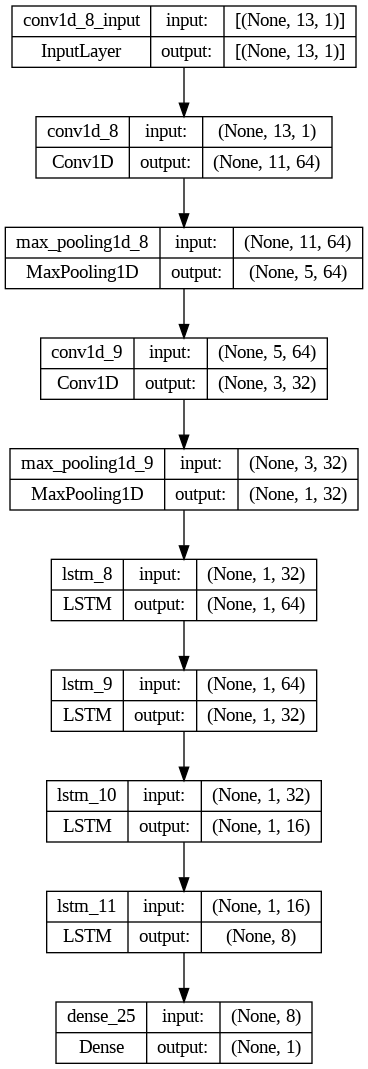

In [ ]:
tf.keras.utils.plot_model(model_lon_cnn_lstm, to_file='model_plot_CNN_lstm.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for latitude CNN-LSTM
y_lat_pred_cnn_lstm = model_lat_cnn_lstm.predict(X_test_cnn)
rmse_lat_cnn_lstm = np.sqrt(mean_squared_error(y_lat_test, y_lat_pred_cnn_lstm))
print('Latitude CNN-LSTM Test RMSE:', rmse_lat_cnn_lstm)

# Calculate RMSE for longitude CNN-LSTM
y_lon_pred_cnn_lstm = model_lon_cnn_lstm.predict(X_test_cnn)
rmse_lon_cnn_lstm = np.sqrt(mean_squared_error(y_lon_test, y_lon_pred_cnn_lstm))
print('Longitude CNN-LSTM Test RMSE:', rmse_lon_cnn_lstm)


294/294 [==============================] - 1s 2ms/step
Latitude CNN-LSTM Test RMSE: 0.16393614117327426
294/294 [==============================] - 1s 2ms/step
Longitude CNN-LSTM Test RMSE: 0.19210462982765825


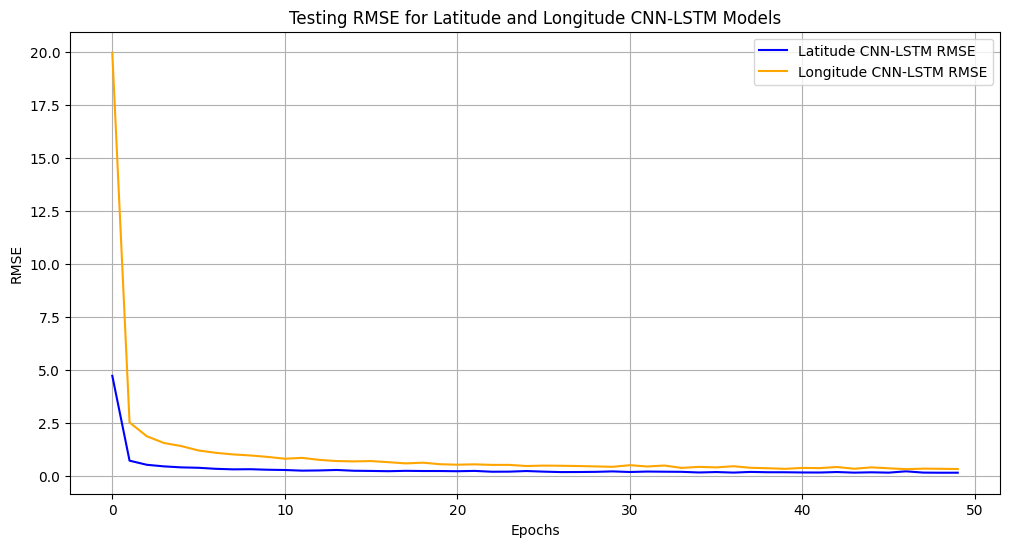

In [ ]:
import matplotlib.pyplot as plt

# Extract the RMSE values from the loss history for latitude and longitude CNN-LSTM models
rmse_lat_cnn_lstm_test = np.sqrt(history_lat_cnn_lstm_dict['loss'])
rmse_lon_cnn_lstm_test = np.sqrt(history_lon_cnn_lstm_dict['loss'])

# Plot RMSE for Latitude and Longitude CNN-LSTM models during testing
plt.figure(figsize=(12, 6))
plt.plot(rmse_lat_cnn_lstm_test, label='Latitude CNN-LSTM RMSE', color='blue')
plt.plot(rmse_lon_cnn_lstm_test, label='Longitude CNN-LSTM RMSE', color='orange')
plt.title('Testing RMSE for Latitude and Longitude CNN-LSTM Models')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.savefig('/content/plotssaved/CNN-LSTM RMSE.png')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) for Latitude and Longitude CNN-LSTM Models
mse_lat_cnn_lstm = mean_squared_error(y_lat_test, y_lat_pred_cnn_lstm)
mse_lon_cnn_lstm = mean_squared_error(y_lon_test, y_lon_pred_cnn_lstm)

# Calculate Mean Absolute Error (MAE) for Latitude and Longitude CNN-LSTM Models
mae_lat_cnn_lstm = mean_absolute_error(y_lat_test, y_lat_pred_cnn_lstm)
mae_lon_cnn_lstm = mean_absolute_error(y_lon_test, y_lon_pred_cnn_lstm)

# Print MSE and MAE for Latitude and Longitude CNN-LSTM Models
print('Latitude CNN-LSTM MSE:', mse_lat_cnn_lstm)
print('Latitude CNN-LSTM MAE:', mae_lat_cnn_lstm)
print('Longitude CNN-LSTM MSE:', mse_lon_cnn_lstm)
print('Longitude CNN-LSTM MAE:', mae_lon_cnn_lstm)

Latitude CNN-LSTM MSE: 0.02687505838278371
Latitude CNN-LSTM MAE: 0.12664587357656654
Longitude CNN-LSTM MSE: 0.0369041888012216
Longitude CNN-LSTM MAE: 0.13701749423233026


In [ ]:

# Reshape input for prediction
X_predict_cnn = X.reshape((X.shape[0], X.shape[1], 1))

# Predict latitude for all instances
y_lat_predicted = model_lat_cnn_lstm.predict(X_predict_cnn)

# Predict longitude for all instances
y_lon_predicted = model_lon_cnn_lstm.predict(X_predict_cnn)

# Append predicted latitude and longitude to df_predicted DataFrame
df_predicted['CNN_LSTM_latitude'] = y_lat_predicted
df_predicted['CNN_LSTM_longitude'] = y_lon_predicted

# Print the updated DataFrame
df_predicted.head(10)


1470/1470 [==============================] - 4s 2ms/step


,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,...,CNN_latitude,CNN_longitude,CNN_GRU_latitude,CNN_GRU_longitude,MLP_latitude,MLP_longitude,LSTM_latitude,LSTM_longitude,CNN_LSTM_latitude,CNN_LSTM_longitude
0,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 00:00:00,2,19.1000,88.3000,...,19.002893,88.585617,19.004250,88.150047,19.181009,88.413445,19.158871,88.695702,19.224571,88.361725
1,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 03:00:00,2,19.1667,88.1000,...,18.990755,88.347290,19.095123,87.959969,19.229584,88.209572,19.217693,88.471397,19.218493,88.215950
2,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 06:00:00,2,19.2602,87.8152,...,19.071743,88.092690,19.202682,87.678200,19.318932,87.924225,19.310333,88.213760,19.358231,88.033691
3,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 09:00:00,2,19.3574,87.5202,...,19.205883,87.843071,19.306202,87.384140,19.413635,87.623680,19.404413,87.946976,19.506311,87.749329
4,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 12:00:00,2,19.4502,87.2414,...,19.369192,87.576538,19.424809,87.099731,19.502995,87.341171,19.494431,87.691757,19.598372,87.342560
5,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 15:00:00,2,19.5462,86.9462,...,19.467001,87.297958,19.532896,86.806999,19.595873,87.043549,19.592438,87.407829,19.687893,86.979782
6,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 18:00:00,2,19.6506,86.6668,...,19.569666,87.001373,19.626837,86.545692,19.697535,86.757759,19.700308,87.146202,19.793604,86.757294
7,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-11 21:00:00,2,19.7734,86.4183,...,19.700468,86.673630,19.757900,86.293274,19.820526,86.505875,19.826334,86.889633,19.969767,86.431519
8,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-12 00:00:00,2,19.9209,86.1496,...,19.860764,86.328857,19.903927,86.014656,19.968277,86.235756,19.974205,86.595573,20.116415,86.093124
9,1900162N19088,1900,8.0,NI,1,NOT_NAMED,1900-06-12 03:00:00,2,20.0925,85.8075,...,19.986746,85.949554,20.067696,85.662674,20.141893,85.895744,20.141731,86.246834,20.253208,85.672607


In [ ]:
df_predicted.columns

Index(['SID_ ', 'SEASON_Year', 'NUMBER_ ', 'BASIN_ ', 'SUBBASIN_ ', 'NAME_ ',
       'ISO_TIME_ ', 'NATURE_ ', 'LAT_degrees_north', 'LON_degrees_east',
       'TRACK_TYPE_ ', 'DIST2LAND_km', 'LANDFALL_km', 'STORM_SPEED_kts',
       'STORM_DIR_degrees', 'ANGLE', 'DISTANCE_km', 'TIME_DIFFERENCE_hours',
       'Hour_of_the_Day', 'Day_of_the_Week', 'Month', 'Season',
       'Time_Since_Start', 'CNN_latitude', 'CNN_longitude', 'CNN_GRU_latitude',
       'CNN_GRU_longitude', 'MLP_latitude', 'MLP_longitude', 'LSTM_latitude',
       'LSTM_longitude', 'CNN_LSTM_latitude', 'CNN_LSTM_longitude'],
      dtype='object')

In [ ]:
df_predicted.to_csv('predicted.csv')

In [ ]:
from google.colab import files

In [ ]:
# prompt: zip a folder and download it
files.download('/content/plotssaved.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/plotssaved.zip /content/plotssaved
files.download('/content/plotssaved.zip')

updating: content/plotssaved/ (stored 0%)
updating: content/plotssaved/model_plot_cnn-gru.png (deflated 17%)
updating: content/plotssaved/model_plot_cnn.png (deflated 17%)
updating: content/plotssaved/.ipynb_checkpoints/ (stored 0%)
updating: content/plotssaved/model_plot_mlp.png (deflated 17%)
updating: content/plotssaved/model_plot_CNN_lstm.png (deflated 15%)
updating: content/plotssaved/model_plot_lstm.png (deflated 14%)
updating: content/plotssaved/count_cyclones_by_year_range_and_subbasin_with_annotations.png (deflated 13%)
  adding: content/plotssaved/MLP.png (deflated 10%)
  adding: content/plotssaved/CNN_GRU.png (deflated 10%)
  adding: content/plotssaved/CNN.png (deflated 10%)
  adding: content/plotssaved/LSTM.png (deflated 10%)
  adding: content/plotssaved/MLP_RMSE.png (deflated 15%)
  adding: content/plotssaved/LSTM_RMSE.png (deflated 14%)
  adding: content/plotssaved/CNN-LSTM RMSE.png (deflated 15%)
  adding: content/plotssaved/CNN_RMSE.png (deflated 15%)
  adding: content/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Filter instances where NAME_ is MICHUANG
michuang_instances = df_predicted[df_predicted['NAME_ '] == 'MICHAUNG']

# Create a new DataFrame
michuang_df = pd.DataFrame(michuang_instances)

michuang_df = pd.DataFrame(michuang_instances).reset_index(drop=True)

# Update the first point of CNN_latitude and CNN_longitude
michuang_df.loc[0, 'CNN_latitude'] = michuang_df.loc[0, 'LAT_degrees_north']
michuang_df.loc[0, 'CNN_longitude'] = michuang_df.loc[0, 'LON_degrees_east']

print(df)
# Print the new DataFrame
print(michuang_df)

               SID_  SEASON_Year NUMBER_  BASIN_  SUBBASIN_      NAME_   \
1      1842298N11080        1842        1      NI         BB  NOT_NAMED   
2      1842298N11080        1842        1      NI         BB  NOT_NAMED   
3      1842298N11080        1842        1      NI         BB  NOT_NAMED   
4      1842298N11080        1842        1      NI         BB  NOT_NAMED   
5      1842298N11080        1842        1      NI         BB  NOT_NAMED   
...              ...         ...      ...     ...        ...        ...   
60654  2023337N12083        2023       83      NI         BB   MICHAUNG   
60655  2023337N12083        2023       83      NI         BB   MICHAUNG   
60656  2023337N12083        2023       83      NI         BB   MICHAUNG   
60657  2023337N12083        2023       83      NI         BB   MICHAUNG   
60658  2023337N12083        2023       83      NI         BB   MICHAUNG   

                ISO_TIME_  NATURE_  LAT_degrees_north LON_degrees_east  ...  \
1      1842-10-25 03

In [ ]:
# Update the first point of CNN_latitude and CNN_longitude
michuang_df.loc[0, 'CNN_LSTM_latitude'] = michuang_df.loc[0, 'LAT_degrees_north']
michuang_df.loc[0, 'CNN_LSTM_longitude'] = michuang_df.loc[0, 'LON_degrees_east']

michuang_df.head()

,SID_,SEASON_Year,NUMBER_,BASIN_,SUBBASIN_,NAME_,ISO_TIME_,NATURE_,LAT_degrees_north,LON_degrees_east,...,CNN_latitude,CNN_longitude,CNN_GRU_latitude,CNN_GRU_longitude,MLP_latitude,MLP_longitude,LSTM_latitude,LSTM_longitude,CNN_LSTM_latitude,CNN_LSTM_longitude
0,2023337N12083,2023,83.0,NI,1,MICHAUNG,2023-12-03 00:00:00,5,11.5000,82.5000,...,11.500000,82.500000,11.500000,82.500000,11.500000,82.500000,11.500000,82.500000,11.500000,82.500000
1,2023337N12083,2023,83.0,NI,1,MICHAUNG,2023-12-03 03:00:00,5,11.6175,82.6275,...,11.713127,83.099892,11.584313,82.480896,11.625353,82.843460,11.618721,83.145988,11.727555,82.846909
2,2023337N12083,2023,83.0,NI,1,MICHAUNG,2023-12-03 06:00:00,5,11.8000,82.7000,...,11.911509,83.281570,11.754894,82.540176,11.798398,82.918755,11.796019,83.238594,11.894141,82.901787
3,2023337N12083,2023,83.0,NI,1,MICHAUNG,2023-12-03 09:00:00,5,12.0849,82.6674,...,12.106356,83.114662,12.071226,82.547417,12.151177,82.859810,12.086908,83.213905,12.191600,82.791489
4,2023337N12083,2023,83.0,NI,1,MICHAUNG,2023-12-03 12:00:00,5,12.4000,82.5000,...,12.338675,82.892937,12.368255,82.387138,12.454040,82.698326,12.402877,83.063469,12.473954,82.667847


<ipython-input-137-db3cb3667a36>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')
<ipython-input-137-db3cb3667a36>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='CNN - Predicted Track')


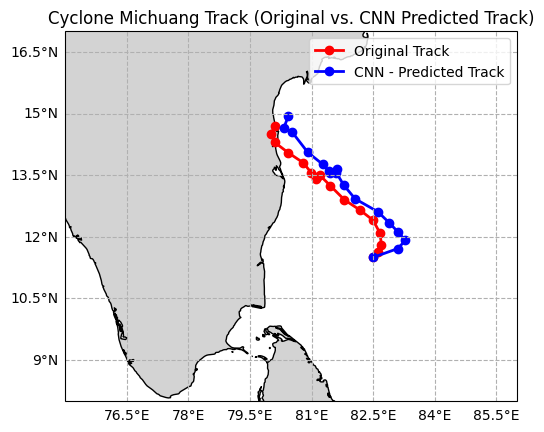

In [ ]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy.feature import NaturalEarthFeature

# Define the coordinates
original_lons =michuang_df['LON_degrees_east'].values
original_lats = michuang_df['LAT_degrees_north'].values
predicted_lons =michuang_df['CNN_longitude'].values
predicted_lats =michuang_df['CNN_latitude'].values

map_proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": map_proj})

# Plot the original track points
ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')

# Plot the predicted track points
ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='CNN - Predicted Track')


# Add land feature
land_feature = NaturalEarthFeature('physical', 'land', '10m', edgecolor='black')
ax.add_feature(land_feature, facecolor='lightgray')

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the plot extent and title
ax.set_xlim(75, 86)
ax.set_ylim(8, 17)
ax.set_title('Cyclone Michuang Track (Original vs. CNN Predicted Track)')

# Add legend
plt.legend()
plt.savefig('/content/plotssaved/CNN.png')
# Show the plot
plt.show()


<ipython-input-138-fb7cd8390cde>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')
<ipython-input-138-fb7cd8390cde>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='CNN_GRU Predicted Track')


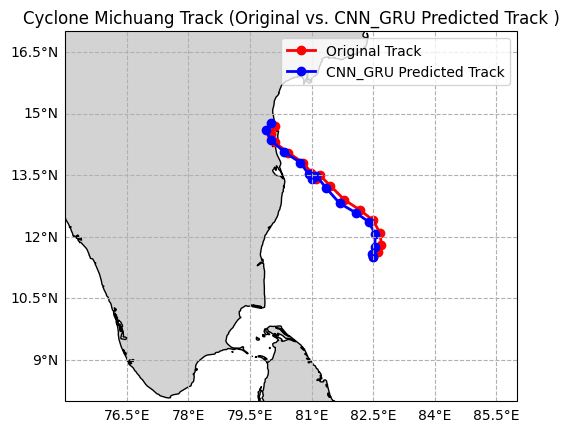

In [ ]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy.feature import NaturalEarthFeature

# Define the coordinates
original_lons =michuang_df['LON_degrees_east'].values
original_lats = michuang_df['LAT_degrees_north'].values
predicted_lons =michuang_df['CNN_GRU_longitude'].values
predicted_lats =michuang_df['CNN_GRU_latitude'].values

map_proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": map_proj})

# Plot the original track points
ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')

# Plot the predicted track points
ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='CNN_GRU Predicted Track')


# Add land feature
land_feature = NaturalEarthFeature('physical', 'land', '10m', edgecolor='black')
ax.add_feature(land_feature, facecolor='lightgray')

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the plot extent and title
ax.set_xlim(75, 86)
ax.set_ylim(8, 17)
ax.set_title('Cyclone Michuang Track (Original vs. CNN_GRU Predicted Track )')

# Add legend
plt.legend()
plt.savefig('/content/plotssaved/CNN_GRU.png')
# Show the plot
plt.show()

<ipython-input-139-01059063e578>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')
<ipython-input-139-01059063e578>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='CNN_LSTM Predicted Track')


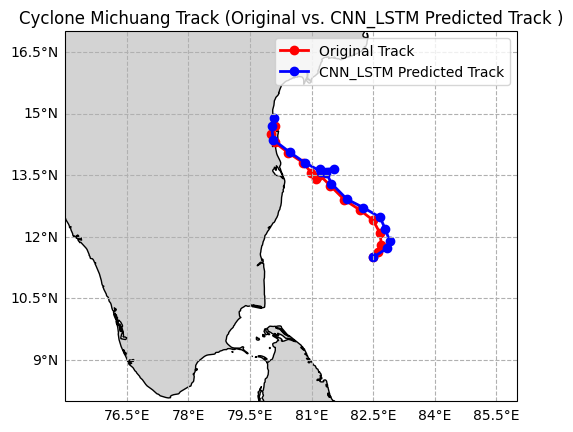

In [ ]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy.feature import NaturalEarthFeature

# Define the coordinates
original_lons =michuang_df['LON_degrees_east'].values
original_lats = michuang_df['LAT_degrees_north'].values
predicted_lons =michuang_df['CNN_LSTM_longitude'].values
predicted_lats =michuang_df['CNN_LSTM_latitude'].values

map_proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": map_proj})

# Plot the original track points
ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')

# Plot the predicted track points
ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='CNN_LSTM Predicted Track')


# Add land feature
land_feature = NaturalEarthFeature('physical', 'land', '10m', edgecolor='black')
ax.add_feature(land_feature, facecolor='lightgray')

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the plot extent and title
ax.set_xlim(75, 86)
ax.set_ylim(8, 17)
ax.set_title('Cyclone Michuang Track (Original vs. CNN_LSTM Predicted Track )')

# Add legend
plt.legend()
plt.savefig('/content/plotssaved/CNN_LSTM.png')

# Show the plot
plt.show()

<ipython-input-145-caf2b236b7ee>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')
<ipython-input-145-caf2b236b7ee>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='LSTM Predicted Track')


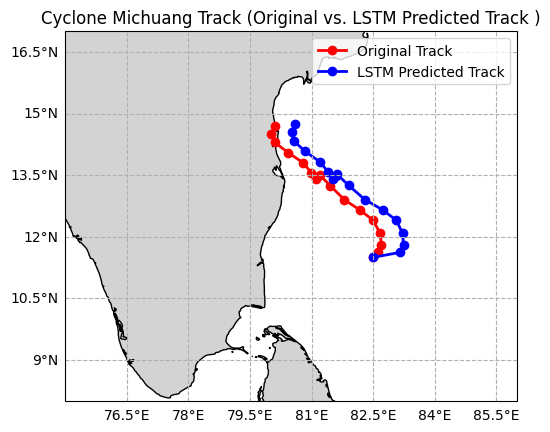

In [ ]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy.feature import NaturalEarthFeature

# Define the coordinates
original_lons =michuang_df['LON_degrees_east'].values
original_lats = michuang_df['LAT_degrees_north'].values
predicted_lons =michuang_df['LSTM_longitude'].values
predicted_lats =michuang_df['LSTM_latitude'].values

map_proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": map_proj})

# Plot the original track points
ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')

# Plot the predicted track points
ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='LSTM Predicted Track')


# Add land feature
land_feature = NaturalEarthFeature('physical', 'land', '10m', edgecolor='black')
ax.add_feature(land_feature, facecolor='lightgray')

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the plot extent and title
ax.set_xlim(75, 86)
ax.set_ylim(8, 17)
ax.set_title('Cyclone Michuang Track (Original vs. LSTM Predicted Track )')

# Add legend
plt.legend()
plt.savefig('/content/plotssaved/LSTM.png')

# Show the plot
plt.show()

<ipython-input-148-0b17f76cc68e>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')
<ipython-input-148-0b17f76cc68e>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='MLP Predicted Track')


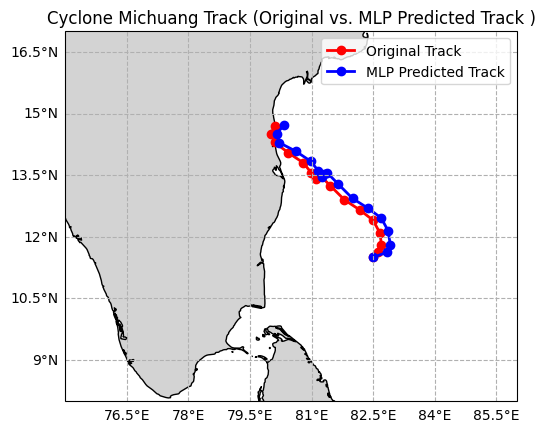

In [ ]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy.feature import NaturalEarthFeature

# Define the coordinates
original_lons =michuang_df['LON_degrees_east'].values
original_lats = michuang_df['LAT_degrees_north'].values
predicted_lons =michuang_df['MLP_longitude'].values
predicted_lats =michuang_df['MLP_latitude'].values

map_proj = ccrs.PlateCarree()

# Create the plot
fig, ax = plt.subplots(subplot_kw={"projection": map_proj})

# Plot the original track points
ax.plot(original_lons, original_lats, 'ro-', color='red', linewidth=2, transform=map_proj, label='Original Track')

# Plot the predicted track points
ax.plot(predicted_lons, predicted_lats, 'bo-', color='blue', linewidth=2, transform=map_proj, label='MLP Predicted Track')


# Add land feature
land_feature = NaturalEarthFeature('physical', 'land', '10m', edgecolor='black')
ax.add_feature(land_feature, facecolor='lightgray')

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Set the plot extent and title
ax.set_xlim(75, 86)
ax.set_ylim(8, 17)
ax.set_title('Cyclone Michuang Track (Original vs. MLP Predicted Track )')

# Add legend
plt.legend()
plt.savefig('/content/plotssaved/MLP.png')

# Show the plot
plt.show()

In [ ]:
michuang_df.to_csv('michuang.csv')